# Análisis Exploratorio de Datos

#### Importo librerías necesarias


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#### Objetivo

El objetivo de esta exploración es poder brindar herramientas e información para mejorar la toma de decisiones de la empresa mendocina AERO "internet que vuela". La misma cuenta con tres grupos de clientes: familia, corporativo y franquicias.  

#### Exploración preliminar de las distintas tablas:

A continución se irá accediendo a un conjunto de Datasets que proveen información sobre Internet en Argentina. Los mismos fueron descargados de la página oficial del Ente Nacional de Comunicaciones (ENACOM). 

Los archivos fueron descargados del siguiente link: https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/. Si bien pudieran ser consumidos por API, sólo se puedo abrir un archivo general en formato JSON, que subí al Github como ETL. Los demás DataFrames fueron descargados como CSV en algunos casos y como Excel en otros casos estos últimos directamente de la pestaña información de cada informe, ya que el formato de unidades era más claro al no mezclar miles con millones. El uso de uno u otro formato aclarado luego en cada DataFrame. 

#### Para poder explorar los Datasets se procede en todos los casos a:

* Abrir el DataFrame.
* Ver las primeras filas.
* Hacer info, ver nulos, cantidad de columnas y tipo de datos de cada columna.
* Hacer conversion de tipo de formato de variables, por ejemplo object a category o int (entero) o float (flotante/decimal) según el caso.
* Reemplazar según sea el caso caracteres, por ejemplo puntos por comas. 
* Revisar unidades y corregir en caso de ser necesario. Por ejemplo millones vs miles. 
* Elimnar columnas vacías.
* Borrar duplicados.
* Cambiar nombres de columnas usando replace().
* Reviso los cambios.
* Observar datos de variables categóricas con funciones como unique() y value_counts().
* Observar datos de variables númericas con funciones como describe().
* Analizar con gráficos los outlayers y tomar decisiones si conservarlos. 
* Hacerle preguntas a los Datos contestando con tablas y gráficos
* En algunos casos, se cruza información para responder estas preguntas. 
* Se escriben observaciones en general y en particular de los gráficos. 

#### El orden de los DataFrames es el siguiente:

1) Penetración de Internet fijo por Provincia 
2) Acceso a Internet fijo por Tecnología y Provincia
3) Accesos Internet fijo por Tecnología en todo el País
4) Accesos a Internet fijo por Tecnología y Localidad
5) Acceso a Internet fijo por rangos de Velocidad de bajada y provincia
6) Listado de Localidades con Conectividad a Internet
7) Accesos a Internet fijo por Velocidad de bajada y Localidad
8) DataFrame 8  Histórico Velocidad Internet por Provincias


## DataFrame 1 Penetración de Internet Fijo por provincia - 
### Acceso a internet por cada 100 hogares por año y provincias


In [2]:
#Abro el archivo csv descargado de ENACOM 

internet_penetracion = pd.read_csv('data\Internet_Penetracion.csv')


In [3]:
#Veo las primeras filas
internet_penetracion.head(10)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
5,2022,4,Córdoba,"89,03",NaN,NaN,NaN
6,2022,4,Corrientes,"51,64",NaN,NaN,NaN
7,2022,4,Entre Ríos,"64,01",NaN,NaN,NaN
8,2022,4,Formosa,"39,41",NaN,NaN,NaN
9,2022,4,Jujuy,"58,46",NaN,NaN,NaN


In [4]:
#Analizo que formato tiene cada columna 
internet_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB


In [5]:
#Conversion de tipo de formato de variables 
internet_penetracion['Provincia'] = internet_penetracion['Provincia'].astype('category')
internet_penetracion['Trimestre'] = internet_penetracion['Trimestre'].astype('category')

#Conversion de tipo de variable con transformacion de "," por "."

internet_penetracion['Accesos por cada 100 hogares'] = internet_penetracion['Accesos por cada 100 hogares'].str.replace(',','.')
internet_penetracion['Accesos por cada 100 hogares'] = internet_penetracion['Accesos por cada 100 hogares'].astype(float)

#Me quedo con los cuatro primeros campos es decir elimino columnas completamente nulas
internet_penetracion = internet_penetracion[['Año',"Trimestre","Provincia","Accesos por cada 100 hogares"]]

internet_penetracion = internet_penetracion.rename(columns={'Accesos por cada 100 hogares':'Acceso_c/100_hogares'})
internet_penetracion

,Año,Trimestre,Provincia,Acceso_c/100_hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57
...,...,...,...,...
859,2014,1,Santa Cruz,28.94
860,2014,1,Santa Fe,47.85
861,2014,1,Santiago Del Estero,16.31
862,2014,1,Tierra Del Fuego,63.97


In [6]:
#Borro Duplicados
internet_penetracion.drop_duplicates()

,Año,Trimestre,Provincia,Acceso_c/100_hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57
...,...,...,...,...
859,2014,1,Santa Cruz,28.94
860,2014,1,Santa Fe,47.85
861,2014,1,Santiago Del Estero,16.31
862,2014,1,Tierra Del Fuego,63.97


In [7]:
#confirmo los cambios del tipo
internet_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Año                   864 non-null    int64   
 1   Trimestre             864 non-null    category
 2   Provincia             864 non-null    category
 3   Acceso_c/100_hogares  864 non-null    float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 16.2 KB


#### Reviso las variables categóricas

 ¿Qué años que se incluyen en estos datos?

In [8]:
print(internet_penetracion['Año'].value_counts())

Año
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
Name: count, dtype: int64


¿Qué rovincias que se incluyen en estos datos?

In [9]:
internet_penetracion['Provincia'].unique

<bound method Series.unique of 0             Buenos Aires
1          Capital Federal
2                Catamarca
3                    Chaco
4                   Chubut
              ...         
859             Santa Cruz
860               Santa Fe
861    Santiago Del Estero
862       Tierra Del Fuego
863                Tucumán
Name: Provincia, Length: 864, dtype: category
Categories (24, object): ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', ..., 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán']>

        Todas las provincias de Argentina (24)

#### Descripción de variables numéricas

In [10]:
#desde 2014 a 2022
internet_penetracion['Acceso_c/100_hogares'].describe()

count    864.000000
mean      49.620301
std       23.319150
min        9.350000
25%       32.220000
50%       46.390000
75%       62.442500
max      124.060000
Name: Acceso_c/100_hogares, dtype: float64

       La media de acceso a internet cada 100 hogares es de 50, es decir a nivel nacioanal en promedio de cada 100 hogares 50 tienen acceso a Internet Fijo, con una desviación estandar de 23. El mínimo es de 9 accesos de internet fijo cada 100 y el máximo de 124 accesos. Esta máxima de 124 en el campo Acceso por cada 100 hogares, se estudiará luego ya que es una situación relativamente anómala. 

<Axes: ylabel='Acceso_c/100_hogares'>

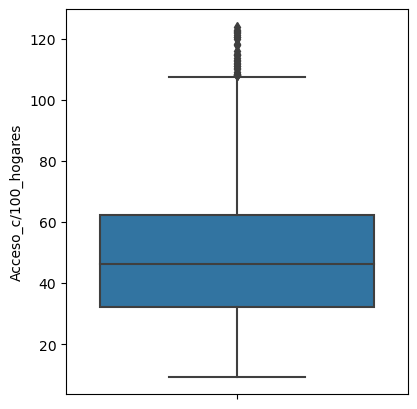

In [11]:
 #Gráficos de caja para analizar Outlayers

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

sns.boxplot(data= internet_penetracion, y= 'Acceso_c/100_hogares')

#### Preguntas a los Datos

¿Pueden existir valores mayores  100? El supuesto que se hace, y para eso confirmo de qué provincia son, es si un hogar puede tener más de un acceso a internet.

In [12]:

provincias_con_acceso_mayor_a_100 = internet_penetracion.loc[internet_penetracion['Acceso_c/100_hogares'] > 100, 'Provincia']
print("Las provincias con accesos mayor a 100 son: " , provincias_con_acceso_mayor_a_100.unique())
print("La cantidad de registros con accesos mayor a 100 es: ", provincias_con_acceso_mayor_a_100.count())



Las provincias con accesos mayor a 100 son:  ['Capital Federal', 'Tierra Del Fuego']
Categories (24, object): ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', ..., 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán']
La cantidad de registros con accesos mayor a 100 es:  37


        Capital Federal tiene el acceso más elevado, que podría ser al haber más de una conexión por hogar. El caso de Tierra del Fuego, resulta llamativo. 

¿Cómo ha sido la evolución del acceso de internet en Argentina a lo largo de los años, desde el 2014 al 2022?

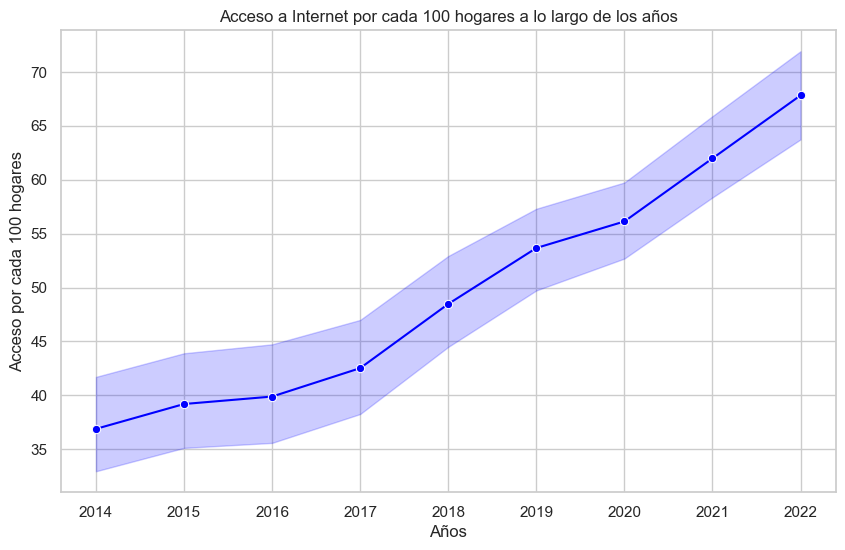

In [13]:
# Configuración del estilo
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x="Año", y="Acceso_c/100_hogares", data=internet_penetracion, marker='o', color='blue')

# Ajustar la presentación del gráfico
plt.title("Acceso a Internet por cada 100 hogares a lo largo de los años")
plt.xlabel("Años")
plt.ylabel("Acceso por cada 100 hogares")

# Mostrar el gráfico
plt.show()

        Con este gráfico de líneas se puede apreciar la evolución en el acceso a internet con un crecimiento continuo desde el año 2014 hasta el año 2022. A simple viste diríamos que cada vez más hogares tienen acceso a internet. Este pensamiento tan general encubriría casos de tener más de una línea por hogar. 

¿Cómo es el acceso a internet cada 100 hogares por provincia para el año 2022?

In [14]:
# Filtra el DataFrame para incluir solo el año 2022
datos_2022_t4_acc = internet_penetracion[(internet_penetracion['Año'] == 2022) & (internet_penetracion['Trimestre'] == 4)]
# Obtén el orden de las provincias basado en la media de 'Acceso_c/100_hogares'
orden_provincias = datos_2022_t4_acc.groupby('Provincia')['Acceso_c/100_hogares'].mean().sort_values(ascending=False).index

suma_acc_nacional = datos_2022_t4_acc['Acceso_c/100_hogares'].sum()
cantidad_prov= datos_2022_t4_acc['Acceso_c/100_hogares'].count()
media_nacional =suma_acc_nacional/cantidad_prov
print(media_nacional)

69.02958333333333


In [15]:
# Obtén el orden de las provincias basado en la media de 'Acceso_c/100_hogares'
df_ordenado= datos_2022_t4_acc.sort_values(by= 'Acceso_c/100_hogares', ascending=False)
#.index
df_ordenado


,Año,Trimestre,Provincia,Acceso_c/100_hogares
1,2022,4,Capital Federal,122.73
22,2022,4,Tierra Del Fuego,101.44
10,2022,4,La Pampa,94.80
18,2022,4,San Luis,90.27
5,2022,4,Córdoba,89.03
4,2022,4,Chubut,85.57
11,2022,4,La Rioja,79.86
0,2022,4,Buenos Aires,78.94
14,2022,4,Neuquén,78.67
20,2022,4,Santa Fe,78.40


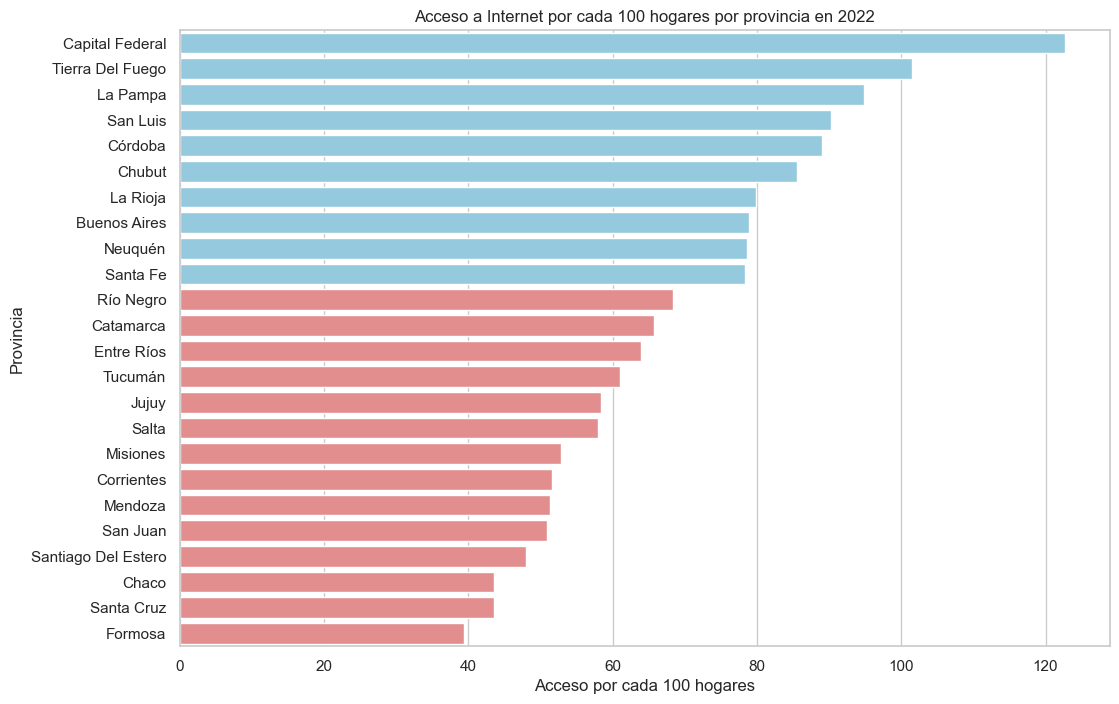

In [16]:
# Ajustamos el estilo del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Utilizamos un gráfico de barras horizontales con el orden deseado
sns.barplot(x="Acceso_c/100_hogares", y="Provincia", data=df_ordenado, order=orden_provincias, palette=np.where(df_ordenado['Acceso_c/100_hogares'] > media_nacional, 'skyblue', 'lightcoral'))

# Ajustamos la presentación del gráfico
plt.title("Acceso a Internet por cada 100 hogares por provincia en 2022")
plt.xlabel("Acceso por cada 100 hogares")
plt.ylabel("Provincia")

# Mostramos el gráfico
plt.show()

        El gráfico de barras muestra para el año 2022 la cantidad de hogares de cada 100 hogres que tienen acceso a internet. Por ejemplo para Mendoza, de cada 100 hogares solo la mitad (50) tienen acceso a internet fijo. 
        En celeste se muestran las provincias que estan por encima de la media nacional y en coral se muestran las provincias por debajo de la media nacional. 

In [17]:
internet_penetracion.to_excel('internet_penetracion.xlsx')

## DataFrame 2 Acceso a Internet Fijo por Tecnología y Provincia

In [18]:
1  #Abro el archivo csv descargado de ENACOM 
acceso_tecnologia = pd.read_csv('data\Internet_Accesos-por-tecnologia (1).csv')

In [19]:
2 #Veo las primeras filas
acceso_tecnologia.head(10)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
5,2022,4,Córdoba,152.0,457.0,367.0,62.0,11.0,1.0
6,2022,4,Corrientes,34.0,80.0,27.0,9.0,5.0,155.0
7,2022,4,Entre Ríos,56.0,136.0,41.0,26.0,13.0,271.0
8,2022,4,Formosa,14.0,17.0,13.0,18.0,227.0,62.0
9,2022,4,Jujuy,18.0,52.0,43.0,4.0,1.0,118.0


In [20]:
3 #Analizo que formato tiene cada columna y nulos
acceso_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 60.9+ KB


In [21]:
4 #Conversion de tipo de formato de variables 
acceso_tecnologia['Provincia'] = acceso_tecnologia['Provincia'].astype('category')
acceso_tecnologia['Trimestre'] = acceso_tecnologia['Trimestre'].astype('category')
acceso_tecnologia['Trimestre'] = acceso_tecnologia['Trimestre'].astype(str)

In [22]:
#Columna Año
# Remplazar cadenas 2019 * con NaN
acceso_tecnologia['Año'] = acceso_tecnologia['Año'].replace('*', '')
acceso_tecnologia['Año'] = acceso_tecnologia['Año'].replace('2019 *', '2019')


In [23]:
acceso_tecnologia['Año'].dropna()

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
860    2014
861    2014
862    2014
863    2014
864        
Name: Año, Length: 865, dtype: object

In [24]:
acceso_tecnologia = acceso_tecnologia[acceso_tecnologia['Año'] != '']


In [25]:

# Convertir la columna 'Año' a tipo float
acceso_tecnologia['Año'] = acceso_tecnologia['Año'].astype(float)


In [26]:
5 #confirmo los cambios del tipo
acceso_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Año           864 non-null    float64 
 1   Trimestre     864 non-null    object  
 2   Provincia     864 non-null    category
 3   ADSL          864 non-null    float64 
 4   Cablemodem    864 non-null    float64 
 5   Fibra óptica  864 non-null    float64 
 6   Wireless      864 non-null    float64 
 7   Otros         864 non-null    float64 
 8   Total         864 non-null    float64 
dtypes: category(1), float64(7), object(1)
memory usage: 62.3+ KB


In [27]:
#Años y Provincias incluidos en este  DataFrame
print(acceso_tecnologia['Año'].value_counts())
print(acceso_tecnologia['Provincia'].unique()) 

Año
2022.0    96
2021.0    96
2020.0    96
2019.0    96
2018.0    96
2017.0    96
2016.0    96
2015.0    96
2014.0    96
Name: count, dtype: int64
['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', ..., 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán']
Length: 24
Categories (24, object): ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', ..., 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán']


### Tecnologías - Diccionario:

La posibilidad de contratar distintas modalidades de acceso a Internet depende de las ofertas de los operadores en determinada zona geográfica y así también como de la disponibilidad y posibilidades técnicas dentro de dicha zona. 

A continuación, una breve explicación de las distintas modalidades de acceso existentes:

* Acceso Telefónico (Dial-Up):  acceso a Internet a través de un MODEM (1) telefónico y desde una línea del servicio básico de telefonía.

* Acceso por ADSL:acceso a Internet por banda ancha. Utilizar para el tráfico de datos el mismo cable telefónico que para las transmisiones de voz, pero en bandas de frecuencia diferentes. 

* Acceso por Cablemodem: servicio provisto por las prestadoras de televisión por cable

* Acceso por Red de Telefonía Móvil:  utilizan en el país las mismas bandas de frecuencia de la telefonía móvil.

* Acceso Inalámbrico o Wireless: Wireless Internet Service Provider. Básicamente son proveedores de Internet que ofrecen conexión de forma inalámbrica

* Acceso Satelital: el acceso a Internet a través de tecnología Satelital ha tomado relevancia a la hora de proveer el servicio en localidades rurales o con una topografía tal que dificulte la implementación del acceso cableado y/o inalámbrico.

* Acceso por Fibra Optica: transmisión de información a través de la fibra, sumado a sus bajos costos de fabricación

* Acceso por Línea Eléctrica: esta modalidad de acceso a Internet por BPL (1) es la más reciente en el mundo de las telecomunicaciones, posee una gran ventaja respecto de sus competidoras en tanto las redes eléctricas son, por lo general, las que cuentan con la mayor penetración y capilaridad a nivel internacional pero como contrapartida de este mayor acceso al hogar del consumidor puede mencionarse que este tipo de tecnología necesita mayores controles de seguridad al momento de su instalación y durante su uso en tanto, no olvidemos, se trata de conectar equipos de comunicaciones a la corriente eléctrica hogareña de 220V.(1) Broadband Power Line.

* WiMAX: Worldwide Interoperability for Microwave Access, lo que en español se podría traducir como Interoperabilidad Mundial para Acceso por Microondas. Se trata de un método de transmisión de datos a través de ondas de radio, y que utiliza las frecuencias de 2,5 a 5,8 GHz. Útil en zonas rurales, sin necesidad de satélites. 

Fuente: ENACOM, 2022: https://www.enacom.gob.ar/tipos-de-conexion_p112

Transformaciones para que los datos sean correctos en cuanto a sus unidades de medida ¿En que unidades se encuentran los datos? ¿miles o millones?

Búsqueda de información oficial de ENACOM: https://indicadores.enacom.gob.ar/files/informes/2022/T2/2022T2-03%20-%20Acceso%20a%20Internet%20Fija.pdf

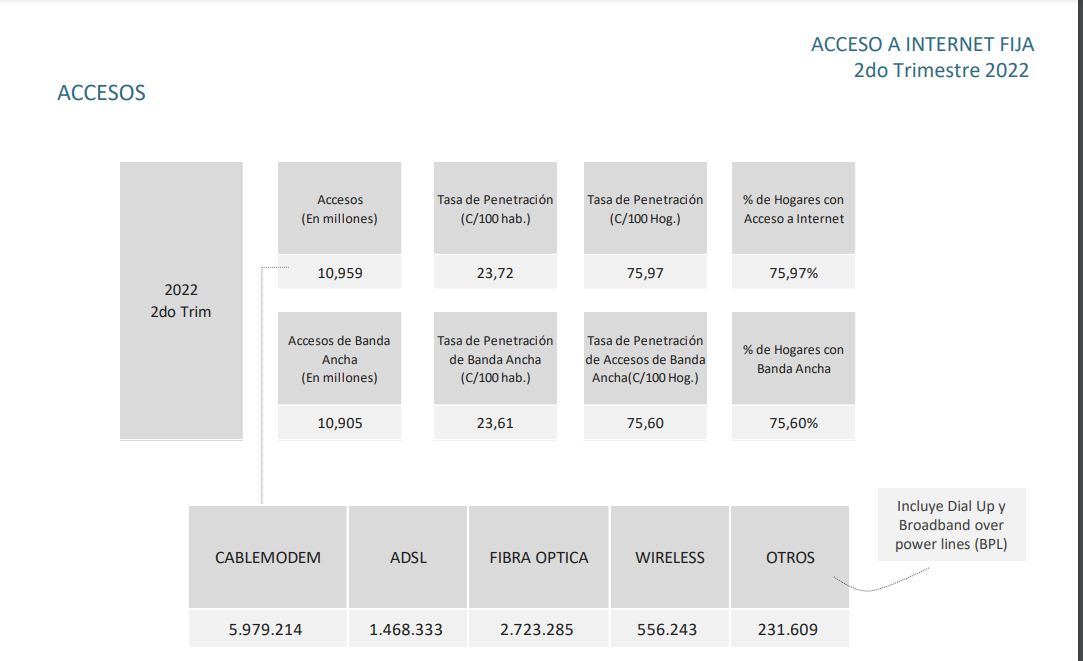

In [28]:
#Pruebo y cruzo datos para ver la cantidad en accesos Cablemodem
df_tecno_2022_ = acceso_tecnologia[(acceso_tecnologia['Año'] == 2022)]
df_tecno_2022_ 
df_tecno_2022_tri = df_tecno_2022_[df_tecno_2022_['Trimestre'] == '4']
df_tecno_2022_tri['Cablemodem'].sum()




2035.0

        Antes de hacer transformaciones el resultado es:  2035 accesos para Cablemodem  nivel nacional.

        Cruazndo información, como se muestra en la imagen, se conoce que este dato de 2035 es erroneo, ya que debería rondar los 6 millones. 

Transformaciones pertinentes para obtener datos que vienen en millon a  formato de miles. Esto será para Buenos Aires y Capital Federal en los campos necesarios.

In [29]:
#Como los datos estan divididos en 'miles' y 'millones' voy a emparejar para dejar todo en miles. Por ejemplo un valor igual a 1.0 que es 1 millon, lo paso a 1000 miles

condicion_provincia = acceso_tecnologia['Provincia'] == 'Buenos Aires'
columnas_a_modificar = ['Cablemodem', 'Fibra óptica', 'ADSL', 'Wireless', 'Otros', 'Total']

# Filtrar por Provincia y valores menores o iguales a 5
condicion_valores = acceso_tecnologia.loc[condicion_provincia, columnas_a_modificar] >= 6

# Aplicar multiplicación solo a valores menores o iguales a 5
acceso_tecnologia.loc[condicion_provincia, columnas_a_modificar] = acceso_tecnologia.loc[condicion_provincia, columnas_a_modificar].where(condicion_valores, lambda x: x * 1000)

# Verificar los cambios
acceso_tecnologia


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022.0,4,Buenos Aires,326.0,3000.0,1000.0,130.0,72.0,5000.0
1,2022.0,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022.0,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022.0,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022.0,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
859,2014.0,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,2014.0,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014.0,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014.0,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0


In [30]:
#condicion_provincia = acceso_tecnologia[acceso_tecnologia['Provincia'] == 'Capital Federal']
#condicion_provincia

In [31]:
#Como los datos estan divididos en 'miles' y 'millones' voy a emparejar para dejar todo en miles. Por ejemplo un valor igual a 1.0 que es 1 millon, lo paso a 1000 miles

condicion_provincia = acceso_tecnologia['Provincia'] == 'Capital Federal'
columnas_a_modificar = ['Cablemodem', 'Fibra óptica', 'ADSL', 'Total'] #no se coloca Wireless y Otros ya que contienen valores menores a 5 mil en sus columnas 

# Filtrar por Provincia y valores menores o iguales a 5
condicion_valores = acceso_tecnologia.loc[condicion_provincia, columnas_a_modificar] >= 5

# Aplicar multiplicación solo a valores menores o iguales a 5
acceso_tecnologia.loc[condicion_provincia, columnas_a_modificar] = acceso_tecnologia.loc[condicion_provincia, columnas_a_modificar].where(condicion_valores, lambda x: x * 1000)

# Verificar los cambios
acceso_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022.0,4,Buenos Aires,326.0,3000.0,1000.0,130.0,72.0,5000.0
1,2022.0,4,Capital Federal,139.0,1000.0,139.0,5.0,32.0,2000.0
2,2022.0,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022.0,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022.0,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
859,2014.0,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,2014.0,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014.0,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014.0,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0


In [32]:
# Realizo un cambio en el nombre de tecnologías para que sea más comprensible.
nuevos_nombres = {
    'ADSL': 'Banda ancha',
    'Wireless': 'Inalambrico',
}
# Utiliza el método rename para cambiar los nombres de las columnas
acceso_tecnologia.rename(columns=nuevos_nombres, inplace=True)
print (acceso_tecnologia.info())

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Año           864 non-null    float64 
 1   Trimestre     864 non-null    object  
 2   Provincia     864 non-null    category
 3   Banda ancha   864 non-null    float64 
 4   Cablemodem    864 non-null    float64 
 5   Fibra óptica  864 non-null    float64 
 6   Inalambrico   864 non-null    float64 
 7   Otros         864 non-null    float64 
 8   Total         864 non-null    float64 
dtypes: category(1), float64(7), object(1)
memory usage: 62.3+ KB
None


#### Descripción de Variables numéricas

In [33]:
 #Describo el dataframe para las tecnologías desde 2014 a 2022 para todas las provincias
columnas_seleccionadas = ['Banda ancha', 'Cablemodem', 'Fibra óptica',	'Inalambrico',	'Otros', 'Total']
# Utiliza el método describe() en las columnas seleccionadas
print("Descripción estadística de las tecnologías desde 2014 a 2022 para todas las provincias")
acceso_tecnologia[columnas_seleccionadas].describe()

Descripción estadística de las tecnologías desde 2014 a 2022 para todas las provincias


,Banda ancha,Cablemodem,Fibra óptica,Inalambrico,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,127.988426,200.416667,171.214120,57.777778,102.712963,338.824074
std,276.524674,434.987639,273.919052,156.015038,207.418981,762.222251
min,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,22.000000,13.000000,10.000000,4.000000,3.000000,52.000000
50%,48.000000,43.500000,26.500000,10.000000,15.000000,104.000000
75%,102.250000,96.250000,187.000000,26.000000,47.000000,175.750000
max,2000.000000,3000.000000,1000.000000,952.000000,987.000000,5000.000000


#### Análisis de Outlayers

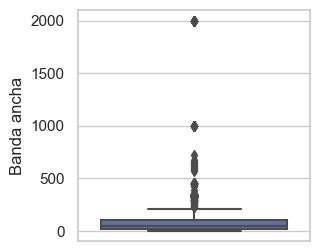

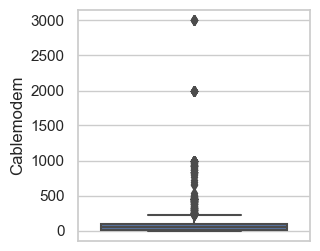

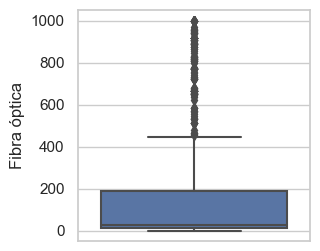

<Axes: ylabel='Total'>

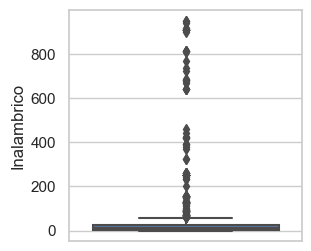

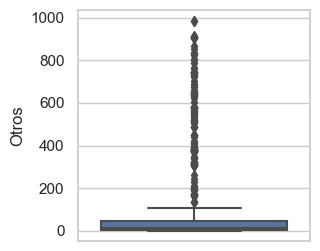

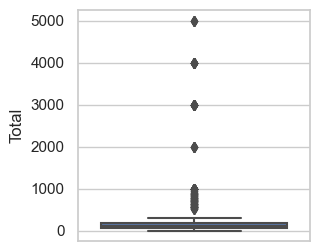

In [34]:
#Banda Ancha
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_tecnologia, y= 'Banda ancha')

#Cablemodem
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_tecnologia, y= 'Cablemodem', ax=ax1)

#Fibra óptica 
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_tecnologia, y= 'Fibra óptica')
plt.show()

#Inalambrico
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_tecnologia, y= 'Inalambrico')

#Otros
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_tecnologia, y= 'Otros')

#Total
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_tecnologia, y= 'Total')

        Los outlayers, se deben a que hay zonas muy pobladas en Argentina como lo son Buenos Aires y Capital Federal. 

        Se corroboró la información con el Excel extraido de ENACOM, validando los valores. https://datosabiertos.enacom.gob.ar/datasets/176072-acceso-a-internet-fijo-por-tecnologia-y-provincia.download/

In [35]:
#reviso que este todo correcto
acceso_tecnologia

,Año,Trimestre,Provincia,Banda ancha,Cablemodem,Fibra óptica,Inalambrico,Otros,Total
0,2022.0,4,Buenos Aires,326.0,3000.0,1000.0,130.0,72.0,5000.0
1,2022.0,4,Capital Federal,139.0,1000.0,139.0,5.0,32.0,2000.0
2,2022.0,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022.0,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022.0,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
859,2014.0,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,2014.0,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014.0,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014.0,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0


#### Preguntas a los Datos:

¿Qué tecnologías usa cada provincia y en que proporción para el 4to trimestre del año 2022?

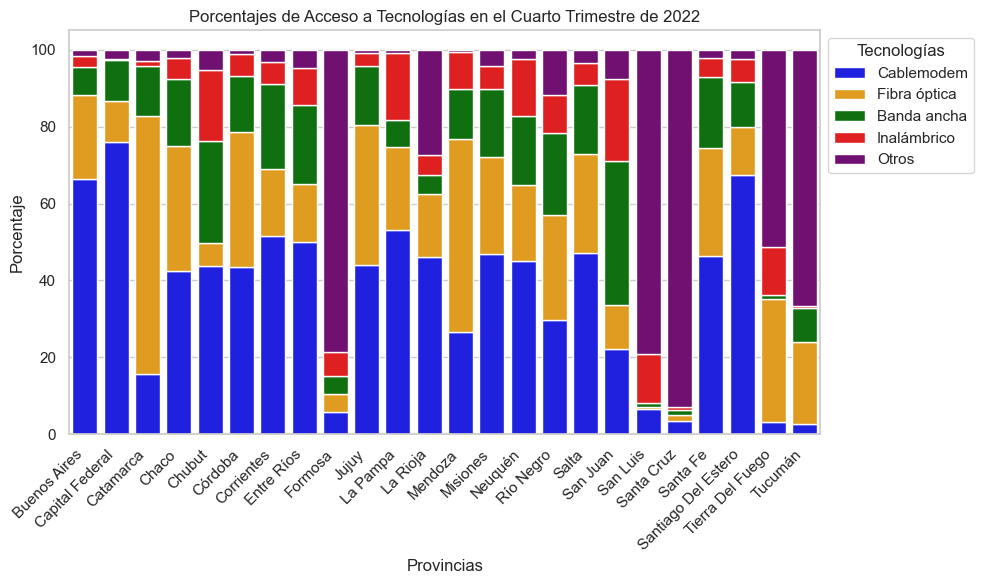

In [36]:
#Grafico de Barras Apiladas Porcentual, para entender el aporte de cada tecnología por provincia sin el ruido de la cantidad de habitantes por provincia que es muy desigual. 



tecnologias = [ 'Cablemodem', 'Fibra óptica', 'Banda ancha', 'Inalambrico', 'Otros']

# Filtrar el DataFrame para el año 2022 y el cuarto trimestre
datos_2022_t4 = acceso_tecnologia[(acceso_tecnologia['Año'] == 2022) & (acceso_tecnologia['Trimestre'] == "4")]

# Crear un DataFrame de porcentajes
datos_porcentajes = datos_2022_t4[tecnologias].div(datos_2022_t4[tecnologias].sum(axis=1), axis=0) * 100

# Obtener las etiquetas de las provincias
provincias = datos_2022_t4['Provincia'].unique()

# Graficar
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=datos_porcentajes, x=datos_porcentajes.index, y='Cablemodem', color='blue', label='Cablemodem', ax=ax)
sns.barplot(data=datos_porcentajes, x=datos_porcentajes.index, y='Fibra óptica', color='orange', label='Fibra óptica', bottom=datos_porcentajes['Cablemodem'], ax=ax)
sns.barplot(data=datos_porcentajes, x=datos_porcentajes.index, y='Banda ancha', color='green', label='Banda ancha', bottom=datos_porcentajes['Fibra óptica'] + datos_porcentajes['Cablemodem'], ax=ax)
sns.barplot(data=datos_porcentajes, x=datos_porcentajes.index, y='Inalambrico', color='red', label='Inalámbrico', bottom=datos_porcentajes['Banda ancha'] + datos_porcentajes['Cablemodem'] + datos_porcentajes['Fibra óptica'], ax=ax)
sns.barplot(data=datos_porcentajes, x=datos_porcentajes.index, y='Otros', color='purple', label='Otros', bottom=datos_porcentajes['Banda ancha'] + datos_porcentajes['Cablemodem'] + datos_porcentajes['Fibra óptica'] + datos_porcentajes['Inalambrico'], ax=ax)

# Configurar etiquetas de las provincias en el eje x
ax.set_xticks(range(len(provincias)))
ax.set_xticklabels(provincias, rotation=45, ha='right')

ax.set_ylabel('Porcentaje')
ax.set_xlabel('Provincias')
ax.set_title('Porcentajes de Acceso a Tecnologías en el Cuarto Trimestre de 2022')
ax.legend(title='Tecnologías', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


        En gráfico de barras apiladas por porcentaje, se puede comparar la participación de cada tecnología sin importar la cantidad de accesos por provincia, que tiene que ver en gran medida con la cantidad de población de cada región. Cada color en la barra representa el porcentaje de conexiones de cada tipo de tecnología por provincia. 

        En azul Banda ancha, en amarillo Cablemodem, en verde Fibra óptica, en rojo Inalámbrico y en violeta Otros.

        Según este gráfico, en general Cablemodem es la tecnología más expandida, con entre 50% a 80% de los accesos variando según cada provincia. Luego Fibra óptica que ronda de manera general el 30% de la conexiones, aunque provincias como Catamarca tienen gran acceso por este medio con el 60%. La tecnología Banda ancha, ronda entre un 15% y un 20%, siendo más importante en San Juan con casi el 40%. El caso de las conexiones inalámbricas, tienen menos prestaciones y rondan el 10%. 

        Existen provincias como Formosa, San LUis, Santa Cruz, Tierra del Fuego y Tucumán, donde la presencia de la categoría OTROS, es de entre un 50% a un 90%, pero no se puede precisar mayor información. Según el informe de ENACOM mecionado anteriormente, la categoría "Otros" incluye  Dial Up y Broadband over power lines (BPL)

In [37]:
acceso_tecnologia.to_csv('acceso_tecnologia_provincia.csv')
acceso_tecnologia.to_excel('acceso_tecnologia_provincia.xlsx')


In [38]:
acceso_tecnologia

,Año,Trimestre,Provincia,Banda ancha,Cablemodem,Fibra óptica,Inalambrico,Otros,Total
0,2022.0,4,Buenos Aires,326.0,3000.0,1000.0,130.0,72.0,5000.0
1,2022.0,4,Capital Federal,139.0,1000.0,139.0,5.0,32.0,2000.0
2,2022.0,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022.0,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022.0,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
859,2014.0,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,2014.0,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014.0,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014.0,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0


## DataFrame 3 Accesos Internet Fijo por tecnología País.

In [39]:
1  #Abro el archivo csv descargado de ENACOM 
acceso_nacional_tecno = pd.read_csv('data\Internet_Accesos-por-tecnologia.csv')

In [40]:
2 #Veo las primeras filas
acceso_nacional_tecno.head(10)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021
5,2021,3,2,6,2,492,250,10,Jul-Sept 2021
6,2021,2,2,6,1,477,254,10,Abr-Jun 2021
7,2021,1,2,5,1,435,250,10,Ene-Mar 2021
8,2020,4,2,5,1,422,253,10,Oct-Dic 2020
9,2020,3,2,5,1,413,249,9,Jul-Sept 2020


In [41]:
3 #Analizo que formato tiene cada columna y nulos
acceso_nacional_tecno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


In [42]:
4 #Conversion de tipo de formato de variables 
acceso_nacional_tecno['Periodo'] = acceso_nacional_tecno['Periodo'].astype('category')
5 #confirmo los cambios del tipo
acceso_nacional_tecno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Año           36 non-null     int64   
 1   Trimestre     36 non-null     int64   
 2   ADSL          36 non-null     int64   
 3   Cablemodem    36 non-null     int64   
 4   Fibra óptica  36 non-null     int64   
 5   Wireless      36 non-null     int64   
 6   Otros         36 non-null     int64   
 7   Total         36 non-null     int64   
 8   Periodo       36 non-null     category
dtypes: category(1), int64(8)
memory usage: 3.7 KB


In [43]:
# Realizo un cambio en el nombre de tecnologías para que sea más comprensible.
nuevos_nombres = {
    'ADSL': 'Banda ancha',
    'Wireless': 'Inalambrico',
}
# Utiliza el método rename para cambiar los nombres de las columnas
acceso_nacional_tecno.rename(columns=nuevos_nombres, inplace=True)
print (acceso_nacional_tecno.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Año           36 non-null     int64   
 1   Trimestre     36 non-null     int64   
 2   Banda ancha   36 non-null     int64   
 3   Cablemodem    36 non-null     int64   
 4   Fibra óptica  36 non-null     int64   
 5   Inalambrico   36 non-null     int64   
 6   Otros         36 non-null     int64   
 7   Total         36 non-null     int64   
 8   Periodo       36 non-null     category
dtypes: category(1), int64(8)
memory usage: 3.7 KB
None


In [44]:
columnas_a_modificar = ['Cablemodem', 'Fibra óptica', 'Banda ancha', 'Inalambrico', 'Otros', 'Total']

# Filtrar valores mayores o iguales a 6 en todas las provincias
condicion_valores = acceso_nacional_tecno[columnas_a_modificar] >= 12

# Aplicar multiplicación solo a valores mayores o iguales a 6
acceso_nacional_tecno[columnas_a_modificar] = acceso_nacional_tecno[columnas_a_modificar].where(condicion_valores, lambda x: x * 1000)

# Verificar los cambios
acceso_nacional_tecno.head(5)

,Año,Trimestre,Banda ancha,Cablemodem,Fibra óptica,Inalambrico,Otros,Total,Periodo
0,2022,4,1000,6000,3000,573,222,11000,Oct-Dic 2022
1,2022,3,1000,6000,3000,557,235,11000,Jul-Sept 2022
2,2022,2,1000,6000,3000,556,232,11000,Abr-Jun 2022
3,2022,1,2000,6000,2000,546,252,11000,Ene-Mar 2022
4,2021,4,2000,6000,2000,523,253,10000,Oct-Dic 2021


In [45]:
#Años y Provincias incluidos en este  DataFrame
print(internet_penetracion['Año'].value_counts())
print(internet_penetracion['Año'].unique()) 

Año
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
Name: count, dtype: int64
[2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [46]:
#Describo el dataframe para las tecnologías desde 2014 a 2022 para todas las provincias
columnas_seleccionadas = ['Banda ancha', 'Cablemodem', 'Fibra óptica','Inalambrico','Otros', 'Total']
# Utiliza el método describe() en las columnas seleccionadas
print("Descripción estadística de las tecnologías desde 2014 a 2022 ")
acceso_nacional_tecno[columnas_seleccionadas].describe()

Descripción estadística de las tecnologías desde 2014 a 2022 


,Banda ancha,Cablemodem,Fibra óptica,Inalambrico,Otros,Total
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,3083.333333,4166.666667,776.111111,257.222222,149.500000,8361.111111
std,1079.020720,1253.566341,872.968852,180.185319,85.497034,1495.761207
min,1000.000000,2000.000000,139.000000,71.000000,54.000000,6000.000000
25%,2000.000000,3000.000000,168.000000,85.000000,64.250000,7000.000000
50%,4000.000000,4000.000000,236.500000,220.000000,116.500000,8000.000000
75%,4000.000000,5000.000000,1000.000000,415.250000,247.500000,9250.000000
max,4000.000000,6000.000000,3000.000000,573.000000,265.000000,11000.000000


        Apreciando la media, podemos ver que Cablemodem es la tecnología más usual a nivel nacional en todo el período analizado        

### Análisis de Outlayers

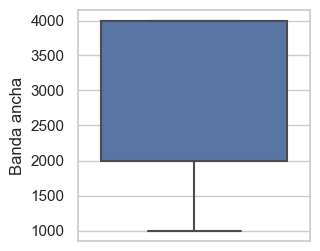

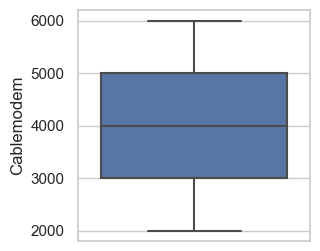

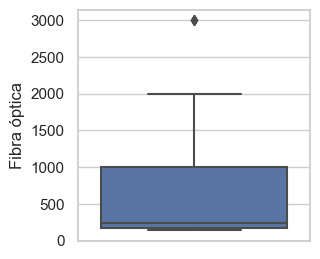

<Axes: ylabel='Total'>

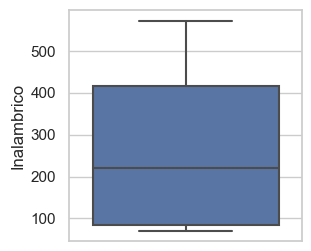

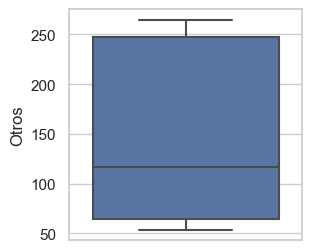

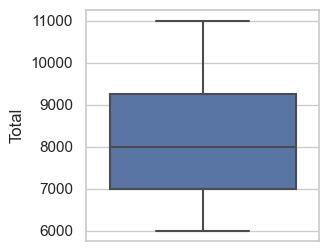

In [47]:
#Banda Ancha
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_nacional_tecno, y= 'Banda ancha')

#Cablemodem
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_nacional_tecno, y= 'Cablemodem', ax=ax1)

#Fibra óptica 
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_nacional_tecno, y= 'Fibra óptica')
plt.show()

#Inalambrico
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_nacional_tecno, y= 'Inalambrico')

#Otros
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_nacional_tecno, y= 'Otros')

#Total
fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot()
sns.boxplot(data= acceso_nacional_tecno, y= 'Total')

        Aquí podemos ver que no hay outlayers y que por las escalas hay tecnologías más utilizadas que otras. 

#### Preguntas a los Datos: 

¿Cómo ha sido la evolución de las distintas tecnologías de Internet en Argentina?

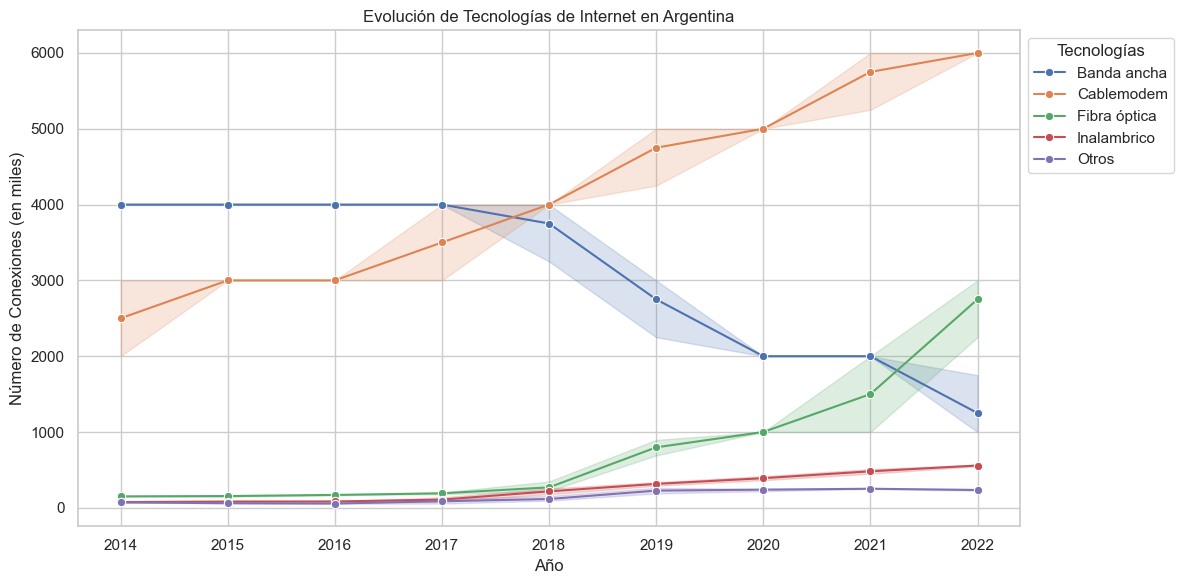

'Donde dice 4000 miles, equivale a 4000000, es decir 4 millones'

In [48]:
#Gráfico de línea

tecnologias = ['Banda ancha', 'Cablemodem', 'Fibra óptica', 'Inalambrico', 'Otros']

# Filtrar las tecnologías de interés
datos_tecnologias = acceso_nacional_tecno[['Año', 'Trimestre'] + tecnologias]

# Agrupar por año y trimestre y sumar los valores
datos_tecnologias = datos_tecnologias.groupby(['Año', 'Trimestre']).sum().reset_index()

# Configurar el estilo de la visualización
sns.set(style="whitegrid")

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 6))

for tecnologia in tecnologias:
    sns.lineplot(data=datos_tecnologias, x='Año', y=tecnologia, label=tecnologia, marker='o')

ax.set_ylabel('Número de Conexiones (en miles)')
ax.set_xlabel('Año')
ax.set_title('Evolución de Tecnologías de Internet en Argentina')

plt.legend(title='Tecnologías', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


'''Donde dice 4000 miles, equivale a 4000000, es decir 4 millones'''

        Lo que podemos decir con este gráfico de línea es clarmete un aumento sostenido de la Tecnología de Internet "Cablemodem", empezando en 2014 con 2,5 millones a tener 6 millones en 2022.

        Se aprecia también una fuerte caída de "Banda ancha" a prtir de 2017-2018, pasando de ser la principal tecnología con 4 millones a ser la tercera con un poco más de 1 millón en 2022. 
        
        Contrariamente en 2018 se empieza a notar un aumento de "Fibra óptica" que se agudizó en el 2020, y paso de 140.000 en 2014 a 3 millones en 2022. 
        
        La categoría "Inalámbrico" tienen un aumento muy suave alcanzando en 2022 las 573.000 conexiones a nivel nacional. 

¿Cuál es el aporte de cada tecnología a nivel nacional para el 4to trimestre 2022?

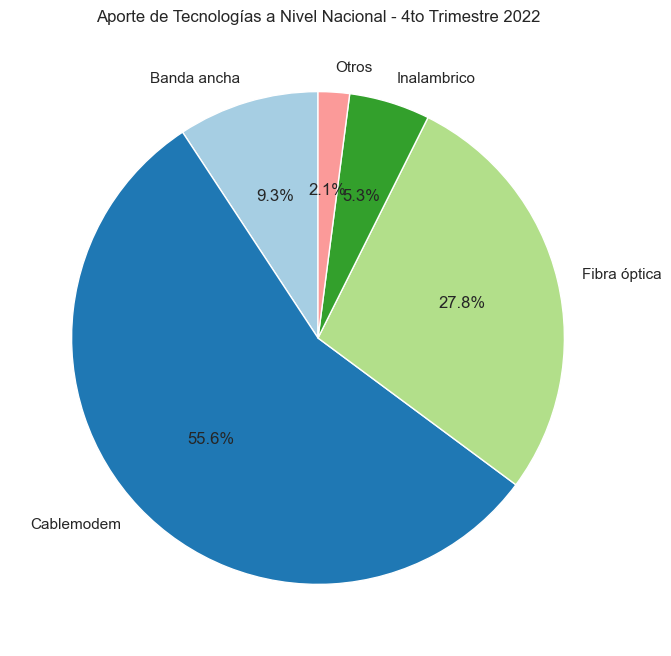

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que ya tienes el DataFrame 'acceso_tecnologia' con las tecnologías y sus valores
# Puedes adaptar esto según tus datos reales

tecnologias = ['Banda ancha', 'Cablemodem', 'Fibra óptica', 'Inalambrico', 'Otros']

# Filtrar el DataFrame para el cuarto trimestre de 2022
datos_2022_t4 = acceso_nacional_tecno[(acceso_nacional_tecno['Año'] == 2022) & (acceso_nacional_tecno['Trimestre'] == 4)].copy()

# Sumar los valores de cada tecnología
total_por_tecnologia = datos_2022_t4[tecnologias].sum()

# Configurar el estilo de la visualización usando seaborn
sns.set(style="whitegrid")

# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(total_por_tecnologia, labels=total_por_tecnologia.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Paired"))
ax.set_title('Aporte de Tecnologías a Nivel Nacional - 4to Trimestre 2022')

plt.show()


        El gráfico de torta representa la distribución del acceso a tecnologías de Internet en Argentina durante el cuarto trimestre de 2022. Los resultados muestran que la tecnología predominante es el cablemódem, que representa el 55.6% del total. Le sigue la fibra óptica con un 27.8%, seguida de la banda ancha con un 9.3%. Las tecnologías inalámbricas representan el 5.35%, mientras que otras tecnologías contribuyen con un 2.1% del total.

In [50]:
#datos a miles 
 #Lista de las columnas que deseas multiplicar por 1000
columnas_a_multiplicar = ['Banda ancha', 'Cablemodem', 'Fibra óptica', 'Inalambrico', 'Otros', 'Total']

# Multiplicar las columnas por 1000
acceso_nacional_tecno[columnas_a_multiplicar] = acceso_nacional_tecno[columnas_a_multiplicar] * 1000

# Mostrar el DataFrame resultante
print(acceso_nacional_tecno)

     Año  Trimestre  Banda ancha  Cablemodem  Fibra óptica  Inalambrico  \
0   2022          4      1000000     6000000       3000000       573000   
1   2022          3      1000000     6000000       3000000       557000   
2   2022          2      1000000     6000000       3000000       556000   
3   2022          1      2000000     6000000       2000000       546000   
4   2021          4      2000000     6000000       2000000       523000   
5   2021          3      2000000     6000000       2000000       492000   
6   2021          2      2000000     6000000       1000000       477000   
7   2021          1      2000000     5000000       1000000       435000   
8   2020          4      2000000     5000000       1000000       422000   
9   2020          3      2000000     5000000       1000000       413000   
10  2020          2      2000000     5000000       1000000       377000   
11  2020          1      2000000     5000000       1000000       352000   
12  2019          4      

In [51]:
acceso_nacional_tecno.to_excel('acceso_nacional_tecno.xlsx')

## DataFrame 4 Accesos a Internet fijo por tecnología y localidad

In [52]:
#1  #Abro el archivo csv descargado de ENACOM 
acceso_tecno_localidad = pd.read_csv('data\AccesosaInternetfijoportecnologiaylocalidad_2791751699333498089.csv')

In [53]:
# #Veo las primeras filas
acceso_tecno_localidad.head(10)


,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN
5,BUENOS AIRES,25 de Mayo,Ernestina,6854030,66,- 0,- 0,- 0,- 0,- 0,- 0,- 0,66,NaN
6,BUENOS AIRES,25 de Mayo,Pedernales,6854070,568,- 0,- 0,- 0,- 0,- 0,- 0,7,575,NaN
7,BUENOS AIRES,9 de Julio,12 de Octubre,6588030,- 0,- 0,- 0,- 0,- 0,- 0,- 0,19,19,NaN
8,BUENOS AIRES,9 de Julio,9 de Julio,6588100,"4,31","3,35",82,"6,23",83,1,- 0,831,"14,89",NaN
9,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),6588010,450,- 0,- 0,- 0,60,- 0,- 0,- 0,510,NaN


In [54]:
#1.B. #Abro el archivo excel descargado de ENACOM
acceso_tecno_localidad_excel = pd.read_excel('excel\Internet-Accesos-por-tecno_por_loc.xlsx')

In [55]:
#2.B # #Veo las primeras filas
acceso_tecno_localidad_excel.head(10)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
5,BUENOS AIRES,25 de Mayo,Ernestina,6854030,66,0,0,0,0,0,0,0,66
6,BUENOS AIRES,25 de Mayo,Pedernales,6854070,568,0,0,0,0,0,0,7,575
7,BUENOS AIRES,9 de Julio,12 de Octubre,6588030,0,0,0,0,0,0,0,19,19
8,BUENOS AIRES,9 de Julio,9 de Julio,6588100,4313,3354,82,6228,83,1,0,831,14892
9,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),6588010,450,0,0,0,60,0,0,0,510


        Trabajo con esta tabla descargada en formato Excel porque los datos vienen mejor preparados

In [56]:

3 #Analizo que formato tiene cada columna y nulos
acceso_tecno_localidad_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3137 non-null   object
 1   Partido        3137 non-null   object
 2   Localidad      3137 non-null   object
 3   Link Indec     3137 non-null   object
 4   ADSL           3137 non-null   int64 
 5   CABLEMODEM     3137 non-null   int64 
 6   DIAL UP        3137 non-null   int64 
 7   FIBRA OPTICA   3137 non-null   int64 
 8   OTROS          3137 non-null   int64 
 9   SATELITAL      3137 non-null   int64 
 10  WIMAX          3137 non-null   int64 
 11  WIRELESS       3137 non-null   int64 
 12  Total general  3137 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 318.7+ KB


In [57]:
4 #Conversion de tipo de formato de variables 
acceso_tecno_localidad_excel['Provincia'] = acceso_tecno_localidad_excel['Provincia'].astype('category')
acceso_tecno_localidad_excel['Partido'] = acceso_tecno_localidad_excel['Partido'].astype('category')
acceso_tecno_localidad_excel['Localidad'] = acceso_tecno_localidad_excel['Localidad'].astype('category')


In [58]:
6 # Cambio nombre a columnas

nuevos_nombres = {
    'Link Indec': 'Código',
    'ADSL': 'Banda ancha',
    'CABLEMODEM': 'Cablemodem',
    'FIBRA OPTICA': 'Fibra óptica',
    'DIAL UP': 'Telefonico',
    'OTROS': 'Otros',
    'SATELITAL': 'Satelital',
    'WIMAX': 'Wimax',
    'WIRELESS':'Inalambrico',
    'Total general':'Total'
}
# Utiliza el método rename para cambiar los nombres de las columnas
acceso_tecno_localidad_excel.rename(columns=nuevos_nombres, inplace=True)

In [59]:
7 #confirmo los cambios del tipo
acceso_tecno_localidad_excel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Provincia     3137 non-null   category
 1   Partido       3137 non-null   category
 2   Localidad     3137 non-null   category
 3   Código        3137 non-null   object  
 4   Banda ancha   3137 non-null   int64   
 5   Cablemodem    3137 non-null   int64   
 6   Telefonico    3137 non-null   int64   
 7   Fibra óptica  3137 non-null   int64   
 8   Otros         3137 non-null   int64   
 9   Satelital     3137 non-null   int64   
 10  Wimax         3137 non-null   int64   
 11  Inalambrico   3137 non-null   int64   
 12  Total         3137 non-null   int64   
dtypes: category(3), int64(9), object(1)
memory usage: 367.6+ KB


#### Análisis de variables categóricas

Variables categóricas: ¿Cuántas provincias, partidos y localidades únicas hay en la tabla? ¿Cuántos registros hay por provincia?


In [60]:

print('Registros por provincia: ', 
      acceso_tecno_localidad_excel['Provincia'].value_counts())
print('Total provincias: ', 
      acceso_tecno_localidad_excel['Provincia'].unique())

Registros por provincia:  Provincia
BUENOS AIRES           713
CORDOBA                397
SANTA FE               353
ENTRE RIOS             149
MENDOZA                145
SANTIAGO DEL ESTERO    130
SALTA                  122
RIO NEGRO              119
SAN LUIS                97
MISIONES                95
JUJUY                   93
LA PAMPA                83
SAN JUAN                81
CHACO                   75
LA RIOJA                75
CATAMARCA               70
TUCUMAN                 68
CHUBUT                  63
CORRIENTES              63
FORMOSA                 63
NEUQUEN                 53
SANTA CRUZ              22
TIERRA DEL FUEGO         7
CABA                     1
Name: count, dtype: int64
Total provincias:  ['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', ..., 'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN']
Length: 24
Categories (24, object): ['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', ..., 'SANTA FE', 'SANTIAGO DEL ESTERO', 'TIERR

In [61]:
print ( 'Partidos: ', acceso_tecno_localidad_excel['Partido'].unique())


Partidos:  ['25 de Mayo', '9 de Julio', 'Adolfo Alsina', 'Adolfo Gonzales Chaves', 'Alberti', ..., 'Simoca', 'Tafí del Valle', 'Tafí Viejo', 'Trancas', 'Yerba Buena']
Length: 432
Categories (432, object): ['12 de Octubre', '1º de Mayo', '2 de Abril', '25 de Mayo', ..., 'Zonda', 'Zárate', 'Ñorquincó', 'Ñorquín']


In [62]:
print(' Localidades: ',acceso_tecno_localidad_excel['Localidad'].unique())

 Localidades:  ['25 de Mayo', 'Del Valle', 'Gobernador Ugarte', 'Norberto de la Riestra', 'Lucas Monteverde', ..., 'Villa Mariano Moreno - El Colmenar', 'San Pedro de Colalao', 'Villa  de Trancas', 'Villa Carmela', 'Yerba Buena - Marcos Paz']
Length: 2849
Categories (2849, object): ['11 De Septiembre', '11 de Octubre', '12 de Octubre', '1º de Mayo', ..., 'Álvarez', 'Árraga', 'Ñanducita', 'Ñorquincó']


        Hay 24 Provincias, 432 Partidos y 2849 Localidades 

#### Análisis de variables numéricas 
¿Cuáles son las tecnologías más utilizadas y cuáles son menos comunes?


In [63]:
#desde 2014 a 2022 para Argentina
columnas_seleccionadas = ['Banda ancha','Cablemodem', 'Telefonico', 'Fibra óptica', 'Satelital', 'Wimax', 'Inalambrico', 'Otros', 'Total']
acceso_tecno_localidad_excel[columnas_seleccionadas].describe()


,Banda ancha,Cablemodem,Telefonico,Fibra óptica,Satelital,Wimax,Inalambrico,Otros,Total
count,3137.000000,3.137000e+03,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3.137000e+03
mean,419.309213,1.924596e+03,3.967485,975.637552,1.108065,0.691106,182.648709,64.918712,3.572877e+03
std,3073.660025,2.363409e+04,44.745777,6599.934747,15.515385,14.933928,705.881401,833.688135,3.165879e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+01
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,1.560000e+02
75%,115.000000,7.000000e+00,0.000000,83.000000,1.000000,0.000000,120.000000,0.000000,1.012000e+03
max,138753.000000,1.238196e+06,2145.000000,222066.000000,852.000000,444.000000,20490.000000,29586.000000,1.551926e+06


        Las tecnologías más comunes son: Cablemodem, Fibra óptica, Banda ancha e Inalambrico. 
        Las tecnologías menos comunes son (de menos comunes a más comunes): Wimax, Satelital y Telefónico

¿Qué sucede con los valores máximos, porqué se alejan de la media?

In [64]:
# Filtro las filas donde la columna Banda ancha es mayor que 35.200 (media mas una desviación estandar)
df_filtrado_T = acceso_tecno_localidad_excel[acceso_tecno_localidad_excel['Total'] >= 35200]

# Obtén la provincia de las filas filtradas
localidad_con_Total_mayor_35200 = df_filtrado_T['Localidad'].unique()

print("Localidades con Total acceso tecnologías mayor a 35200 (media+1std):", localidad_con_Total_mayor_35200)


Localidades con Total acceso tecnologías mayor a 35200 (media+1std): ['Bahía Blanca', 'Berazategui', 'Monte Grande', 'Florencio Varela', 'Mar del Plata', ..., 'San Luis', 'Santa Fe', 'Rosario', 'Santiago del Estero', 'San Miguel de Tucumán (Est. Tucumán)']
Length: 50
Categories (2849, object): ['11 De Septiembre', '11 de Octubre', '12 de Octubre', '1º de Mayo', ..., 'Álvarez', 'Árraga', 'Ñanducita', 'Ñorquincó']


In [65]:
df_localidades_Total_menor_35200 = acceso_tecno_localidad_excel[acceso_tecno_localidad_excel['Total'] < 35200]

In [66]:
df_localidades_Total_menor_35200['Localidad'].unique()

['25 de Mayo', 'Del Valle', 'Gobernador Ugarte', 'Norberto de la Riestra', 'Lucas Monteverde', ..., 'Villa Mariano Moreno - El Colmenar', 'San Pedro de Colalao', 'Villa  de Trancas', 'Villa Carmela', 'Yerba Buena - Marcos Paz']
Length: 2805
Categories (2849, object): ['11 De Septiembre', '11 de Octubre', '12 de Octubre', '1º de Mayo', ..., 'Álvarez', 'Árraga', 'Ñanducita', 'Ñorquincó']

In [67]:
df_localidades_Total_menor_35200.describe()

,Banda ancha,Cablemodem,Telefonico,Fibra óptica,Otros,Satelital,Wimax,Inalambrico,Total
count,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000
mean,261.335601,786.669258,1.717201,498.072238,44.456754,0.995141,0.672498,145.711370,1739.630062
std,870.748256,2816.130064,12.030046,1758.847378,576.291898,15.497861,14.968057,392.782301,4588.731976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,151.000000
75%,94.000000,1.000000,0.000000,61.000000,0.000000,1.000000,0.000000,111.500000,909.000000
max,18661.000000,25557.000000,287.000000,16946.000000,27983.000000,852.000000,444.000000,7694.000000,34995.000000


#### Análisis de Outlayers localidades con menos de 3500 accesos por tecnología totales. 

<Axes: xlabel='Banda ancha'>

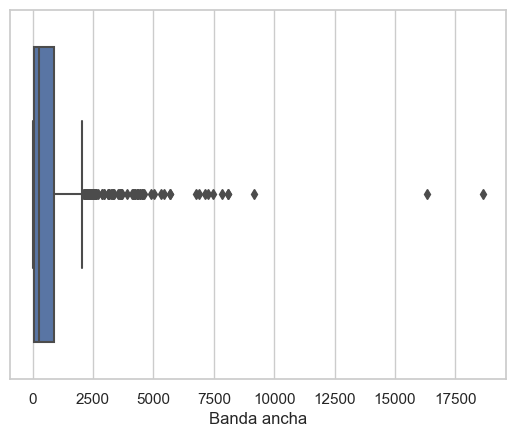

In [68]:
#Banda Ancha
B_a_datos_sin_cero = df_localidades_Total_menor_35200[df_localidades_Total_menor_35200['Banda ancha' ] != 0]

# Crea el boxplot con los datos filtrados
sns.boxplot(x=B_a_datos_sin_cero['Banda ancha'])


<Axes: xlabel='Cablemodem'>

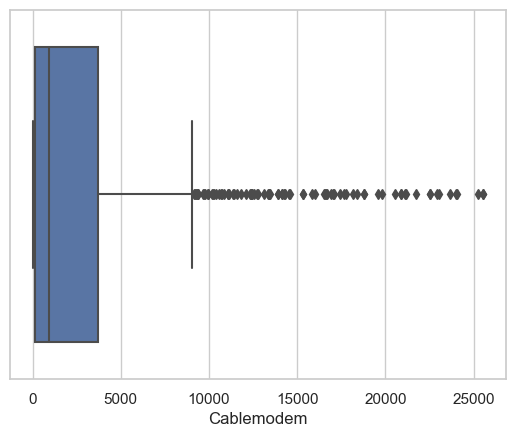

In [69]:

#Cablemodem
B_a_datos_sin_cero = df_localidades_Total_menor_35200[df_localidades_Total_menor_35200['Cablemodem' ] != 0]

# Crea el boxplot con los datos filtrados
sns.boxplot(x=B_a_datos_sin_cero['Cablemodem'])

<Axes: xlabel='Fibra óptica'>

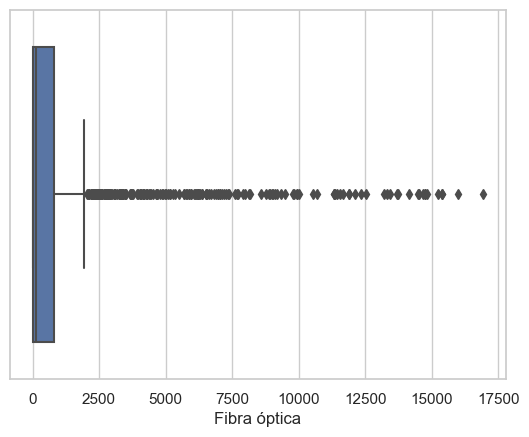

In [70]:


#Fibra óptica 
B_a_datos_sin_cero = df_localidades_Total_menor_35200[df_localidades_Total_menor_35200['Fibra óptica' ] != 0]

# Crea el boxplot con los datos filtrados
sns.boxplot(x=B_a_datos_sin_cero['Fibra óptica'])

<Axes: xlabel='Inalambrico'>

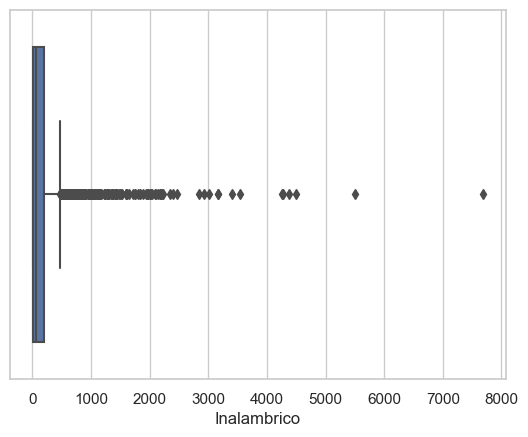

In [71]:
#Inalambrico
B_a_datos_sin_cero = df_localidades_Total_menor_35200[df_localidades_Total_menor_35200['Inalambrico' ] != 0]

# Crea el boxplot con los datos filtrados
sns.boxplot(x=B_a_datos_sin_cero['Inalambrico'])


<Axes: xlabel='Otros'>

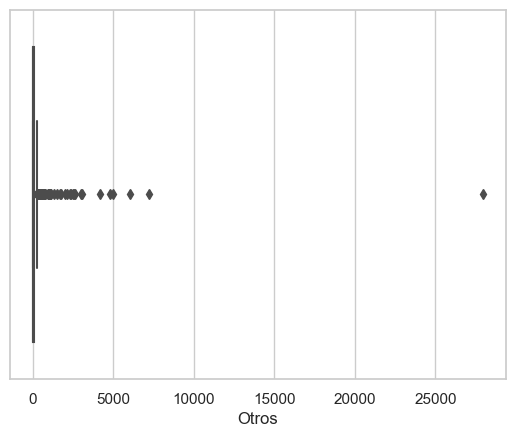

In [72]:

# Otros
B_a_datos_sin_cero = df_localidades_Total_menor_35200[df_localidades_Total_menor_35200['Otros' ] != 0]

# Crea el boxplot con los datos filtrados
sns.boxplot(x=B_a_datos_sin_cero['Otros'])

        Se redujo el DataFrame dejando de lado las localidades donde la cantidad de accesos locales totales era mayor a la media mas una desviación estandar es decir 35000, así se dejaron 50 localidades afuera de un nuevo DataFrame, para poder disminuir el ruido que hacían. Además se dejó de lado los valores cero para poder visualizar aquellos datos donde si había algún valor. 
        Si bien hay muchos valores por arriba de los cuartiles, esto podría deberse a la cantidad de habitantes por localidad. Se podría profundizar de ser necesario, buscando la cantidad de población por localidad.

In [73]:
acceso_tecno_localidad_excel.to_excel('acceso_tecno_localidad.xlsx')

## DataFrame 5 Acceso a Internet Fijo por rangos de velocidad de bajada y provincia
Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia (trimestral)

In [74]:
#1.B. #Abro el archivo excel descargado de ENACOM
acceso_velocidad_prov_excel = pd.read_excel('excel\Internet_Accesos-por-velocidad.xlsx')

In [75]:

2 #Veo las primeras filas
acceso_velocidad_prov_excel.head(10)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0
5,2022,4,Córdoba,99.0,9929.0,143686.0,108195.0,63120.0,20691.0,686330.0,17610.0,1049660.0
6,2022,4,Corrientes,67.0,3282.0,22647.0,24858.0,7025.0,3770.0,85806.0,7998.0,155453.0
7,2022,4,Entre Ríos,107.0,4722.0,45629.0,46700.0,20927.0,22483.0,130406.0,0.0,270974.0
8,2022,4,Formosa,84.0,245.0,22458.0,12391.0,6724.0,310.0,18930.0,698.0,61840.0
9,2022,4,Jujuy,58.0,1763.0,18652.0,14070.0,36430.0,335.0,46910.0,0.0,118218.0


In [76]:
3 #Analizo que formato tiene cada columna y nulos
acceso_velocidad_prov_excel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    float64
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    float64
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 81.1+ KB


In [77]:
4 #Conversion de tipo de formato de variables 
acceso_velocidad_prov_excel['Provincia'] = acceso_velocidad_prov_excel['Provincia'].astype('category')


In [78]:
6 # Cambio nombre a columnas
# Reemplaza estos nombres con los reales de tu DataFrame

nuevos_nombres = {
    'HASTA 512 kbps': 'Hasta 512 kbps',
    'OTROS': 'Otros'
}
# Utiliza el método rename para cambiar los nombres de las columnas
acceso_velocidad_prov_excel.rename(columns=nuevos_nombres, inplace=True)

In [79]:
7 #confirmo los cambios del tipo
acceso_velocidad_prov_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Año                  864 non-null    int64   
 1   Trimestre            864 non-null    int64   
 2   Provincia            864 non-null    category
 3   Hasta 512 kbps       864 non-null    float64 
 4   + 512 Kbps - 1 Mbps  864 non-null    float64 
 5   + 1 Mbps - 6 Mbps    864 non-null    float64 
 6   + 6 Mbps - 10 Mbps   864 non-null    float64 
 7   + 10 Mbps - 20 Mbps  864 non-null    float64 
 8   + 20 Mbps - 30 Mbps  864 non-null    float64 
 9   + 30 Mbps            864 non-null    float64 
 10  Otros                858 non-null    float64 
 11  Total                864 non-null    float64 
dtypes: category(1), float64(9), int64(2)
memory usage: 76.0 KB


#### Variables categóricas: }
¿Cuántas provincias únicas hay en la tabla? ¿Cuántos años y trimestres se registran por provincia?

In [80]:
print('Años registrados: ', acceso_velocidad_prov_excel['Año'].unique())

print('Trimestres registrados: ', acceso_velocidad_prov_excel['Trimestre'].unique())


print('Registros por provincia: ', 
      acceso_velocidad_prov_excel['Provincia'].value_counts())

print('Total provincias: ', 
      acceso_velocidad_prov_excel['Provincia'].unique())


Años registrados:  [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Trimestres registrados:  [4 3 2 1]
Registros por provincia:  Provincia
Buenos Aires           36
Capital Federal        36
Tierra Del Fuego       36
Santiago Del Estero    36
Santa Fe               36
Santa Cruz             36
San Luis               36
San Juan               36
Salta                  36
Río Negro              36
Neuquén                36
Misiones               36
Mendoza                36
La Rioja               36
La Pampa               36
Jujuy                  36
Formosa                36
Entre Ríos             36
Córdoba                36
Corrientes             36
Chubut                 36
Chaco                  36
Catamarca              36
Tucumán                36
Name: count, dtype: int64
Total provincias:  ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', ..., 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán']
Length: 24
Categories (24, object): ['Bue

        Registros desde el 2014 al 2022 para las 24 provincias de Argentina con 4 trimestres al año. 

#### Variables numéricas ¿Cuál es la distribución de las velocidades?


In [81]:
    #desde 2014 a 2022 para Argentina
acceso_velocidad_prov_excel.describe()

,Año,Trimestre,Hasta 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,858.00000,8.640000e+02
mean,2018.000000,2.500000,2065.484954,9960.253472,1.480209e+05,37641.817130,38114.030093,20793.402778,8.555756e+04,5289.20979,3.474059e+05
std,2.583484,1.118682,13459.419708,21992.818620,3.438435e+05,65383.130836,93024.185664,73859.534388,3.635417e+05,13011.53175,7.450600e+05
min,2014.000000,1.000000,6.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.00000,1.240600e+04
25%,2016.000000,1.750000,39.000000,312.000000,2.744150e+04,2929.000000,1579.750000,25.750000,8.000000e+00,0.00000,5.274050e+04
50%,2018.000000,2.500000,109.000000,2536.000000,4.783750e+04,11247.000000,9067.000000,1146.000000,1.019000e+03,0.00000,1.052355e+05
75%,2020.000000,3.250000,541.250000,8056.250000,8.639200e+04,38753.250000,26408.000000,9567.500000,2.247475e+04,5146.00000,1.791482e+05
max,2022.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.00000,4.794665e+06


In [82]:
acceso_velocidad_prov_excel.to_excel('velocidad_prov.xlsx')

¿Cuál es el el rango más frecuente de velocidad por provincia para el 4to trimestre del año 2022?

In [83]:
# Filtra los datos para el cuarto trimestre del año 2022
df_cuarto_trimestre = acceso_velocidad_prov_excel[(acceso_velocidad_prov_excel['Año'] == 2022) & (acceso_velocidad_prov_excel['Trimestre'] == 4)].copy()

# Selecciona las columnas de velocidad para facilitar el cálculo
columnas_de_velocidad = df_cuarto_trimestre.columns[3:-2]

# Encuentra la columna con la velocidad máxima para cada fila y el nombre de la provincia
df_cuarto_trimestre['Columna_Max'] = df_cuarto_trimestre.apply(lambda x: columnas_de_velocidad[x[3:-2].values.argmax()], axis=1)

# Muestra el resultado
print(df_cuarto_trimestre[['Provincia', 'Columna_Max']])


              Provincia          Columna_Max
0          Buenos Aires            + 30 Mbps
1       Capital Federal            + 30 Mbps
2             Catamarca            + 30 Mbps
3                 Chaco            + 30 Mbps
4                Chubut    + 1 Mbps - 6 Mbps
5               Córdoba            + 30 Mbps
6            Corrientes            + 30 Mbps
7            Entre Ríos            + 30 Mbps
8               Formosa    + 1 Mbps - 6 Mbps
9                 Jujuy            + 30 Mbps
10             La Pampa    + 1 Mbps - 6 Mbps
11             La Rioja            + 30 Mbps
12              Mendoza            + 30 Mbps
13             Misiones            + 30 Mbps
14              Neuquén            + 30 Mbps
15            Río Negro            + 30 Mbps
16                Salta            + 30 Mbps
17             San Juan    + 1 Mbps - 6 Mbps
18             San Luis  + 20 Mbps - 30 Mbps
19           Santa Cruz    + 1 Mbps - 6 Mbps
20             Santa Fe            + 30 Mbps
21  Santia

#### Pregunta a los Datos:

¿Cómo es la distribución de rangos de velocidad en cada provincia? ¿Hay provincias con mayores velocidad que otras?

In [84]:
# Lista con el nuevo orden de las columnas
nuevo_orden_columnas = ['Año','Trimestre', 'Provincia', '+ 30 Mbps', '+ 20 Mbps - 30 Mbps', '+ 10 Mbps - 20 Mbps', '+ 6 Mbps - 10 Mbps', '+ 1 Mbps - 6 Mbps', '+ 512 Kbps - 1 Mbps', 'Hasta 512 kbps', 'Otros', 'Total']

# Reorganiza el DataFrame con el nuevo orden de columnas
orden_velocidad_prov= acceso_velocidad_prov_excel[nuevo_orden_columnas]
orden_velocidad_prov

,Año,Trimestre,Provincia,+ 30 Mbps,+ 20 Mbps - 30 Mbps,+ 10 Mbps - 20 Mbps,+ 6 Mbps - 10 Mbps,+ 1 Mbps - 6 Mbps,+ 512 Kbps - 1 Mbps,Hasta 512 kbps,Otros,Total
0,2022,4,Buenos Aires,3760109.0,98670.0,244555.0,281550.0,259866.0,23347.0,28934.0,97634.0,4794665.0
1,2022,4,Capital Federal,1299117.0,8116.0,36336.0,64653.0,31320.0,5096.0,516.0,106772.0,1551926.0
2,2022,4,Catamarca,52739.0,3122.0,4638.0,5028.0,2716.0,315.0,71.0,2280.0,70909.0
3,2022,4,Chaco,94866.0,3039.0,6704.0,17846.0,16067.0,771.0,461.0,3909.0,143663.0
4,2022,4,Chubut,19048.0,15770.0,34728.0,31007.0,46457.0,1614.0,109.0,20026.0,168759.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,0.0,0.0,1.0,1.0,24972.0,1625.0,161.0,0.0,26760.0
860,2014,1,Santa Fe,668.0,23.0,6845.0,20328.0,345225.0,124468.0,8456.0,0.0,506013.0
861,2014,1,Santiago Del Estero,0.0,0.0,109.0,2422.0,22817.0,10531.0,1234.0,0.0,37113.0
862,2014,1,Tierra Del Fuego,0.0,0.0,0.0,6.0,30902.0,607.0,12.0,0.0,31527.0


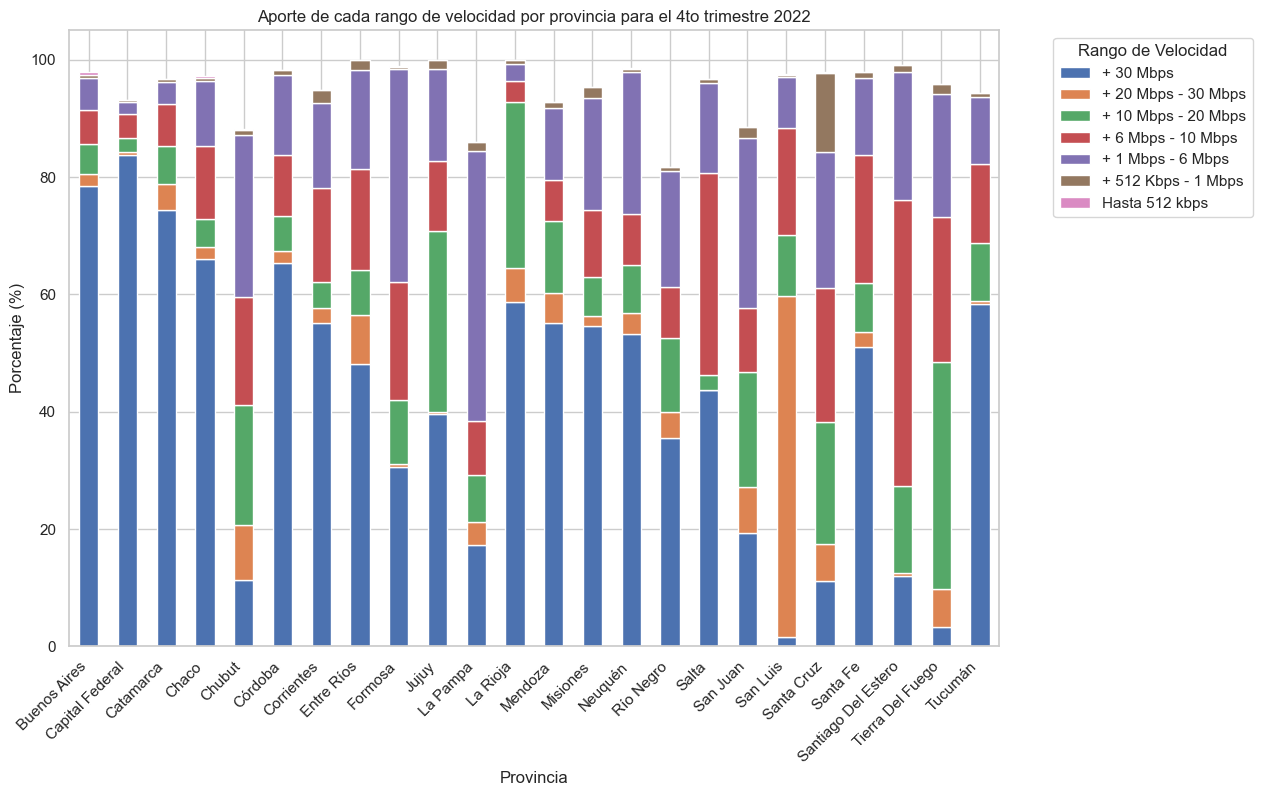

In [85]:
#Creo un gráfico de barras apiladas para encontrar la distribución de rangos de velocidad por provincia.

# Filtra los datos para el cuarto trimestre del año 2022
df_cuarto_trimestre = orden_velocidad_prov[(orden_velocidad_prov['Año'] == 2022) & (orden_velocidad_prov['Trimestre'] == 4)]

# Selecciona las columnas de velocidad para facilitar el cálculo
columnas_de_velocidad = df_cuarto_trimestre.columns[3:-2]

# Calcula los porcentajes para cada rango de velocidad
df_porcentajes = df_cuarto_trimestre[columnas_de_velocidad].div(df_cuarto_trimestre['Total'], axis=0) * 100

# Crea el gráfico de barras apiladas por porcentaje
ax = df_porcentajes.plot(kind='bar', stacked=True, figsize=(12, 8))

# Ajusta la leyenda y las etiquetas
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Rango de Velocidad")
plt.title('Aporte de cada rango de velocidad por provincia para el 4to trimestre 2022')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje (%)')

# Añade los nombres de las provincias en el eje x
ax.set_xticklabels(df_cuarto_trimestre['Provincia'], rotation=45, ha="right")

# Muestra el gráfico
plt.show()


  Según lo observado en esta gráfica:

        * Las provincias que tienen accesos con velocidades de bajada alta, es decir son "rápidas", son: Buenos Aires, Capital Federal, Catamarca y Córdoba con más del 60% de los accesos con velocidad igual o mayor a 30 Mbps.

        * Las provincias que tienen accesos con velocidades de bajada baja, es decir son "lentas", son: Chubut, La Pampa, San Juan, Santa Cruz, Santiago del Estero y Tierra Del Fuego con practicamente el 80% de los accesos con velocidades menores a 20 Mbps.

        * En el resto de las provincias (excepto San Luis) entre el 55% y 60% de la población tiene +30 Mbps, y el resto se reparte en las velocidades menores. 

## DataFrame 6 Listado de Localidades con Conectividad a Internet

In [86]:
1  #Abro el archivo csv descargado de ENACOM 
localidades_conectividad = pd.read_csv('data\Listadodelocalidadesconconectividadainternet_2750221699333544102.csv')

In [87]:
2 #Veo las primeras filas
localidades_conectividad.head(10)

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--
5,BUENOS AIRES,9 de Julio,Marcelino Ugarte (Est. Dennehy),--,--,--,--,SI,--,SI,--,--
6,BUENOS AIRES,9 de Julio,Morea,--,--,--,--,--,--,SI,SI,--
7,BUENOS AIRES,9 de Julio,Norumbega,--,--,--,--,--,--,SI,--,--
8,BUENOS AIRES,9 de Julio,Patricios,SI,--,--,--,--,SI,SI,SI,--
9,BUENOS AIRES,9 de Julio,Villa General Fournier (Est. 9 de Julio Sud),--,--,--,SI,SI,SI,SI,SI,--


In [88]:

3 #Analizo que formato tiene cada columna y nulos
localidades_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   object
 4   Cablemódem      4311 non-null   object
 5   Dial Up         4311 non-null   object
 6   Fibra óptica    4311 non-null   object
 7   4G              4311 non-null   object
 8   3G              4311 non-null   object
 9   Telefonía Fija  4311 non-null   object
 10  Wireless        4311 non-null   object
 11  Satelital       4311 non-null   object
dtypes: object(12)
memory usage: 404.3+ KB


In [89]:
6 # Cambio nombre a columnas
# Reemplaza estos nombres con los reales de tu DataFrame

nuevos_nombres = {
    'ADSL': 'Banda ancha',
    'Wireless': 'Inalambrico',
    'Dial Up': 'Telefonica',
    'Cablemódem': 'Cablemodem'
}
# Utiliza el método rename para cambiar los nombres de las columnas
localidades_conectividad.rename(columns=nuevos_nombres, inplace=True)

In [90]:
#Conversion de tipo de variable con transformacion de "SI" por "1" y "--" por "0"

localidades_conectividad['Banda ancha'] = localidades_conectividad['Banda ancha'].str.replace('SI','1')
localidades_conectividad['Banda ancha'] = localidades_conectividad['Banda ancha'].str.replace('--','0')

localidades_conectividad['Cablemodem'] = localidades_conectividad['Cablemodem'].str.replace('SI','1')
localidades_conectividad['Cablemodem'] = localidades_conectividad['Cablemodem'].str.replace('--','0')

localidades_conectividad['Telefonica'] = localidades_conectividad['Telefonica'].str.replace('SI','1')
localidades_conectividad['Telefonica'] = localidades_conectividad['Telefonica'].str.replace('--','0')

localidades_conectividad['Fibra óptica'] = localidades_conectividad['Fibra óptica'].str.replace('SI','1')
localidades_conectividad['Fibra óptica'] = localidades_conectividad['Fibra óptica'].str.replace('--','0')

localidades_conectividad['4G'] = localidades_conectividad['4G'].str.replace('SI','1')
localidades_conectividad['4G'] = localidades_conectividad['4G'].str.replace('--','0')

localidades_conectividad['3G'] = localidades_conectividad['3G'].str.replace('SI','1')
localidades_conectividad['3G'] = localidades_conectividad['3G'].str.replace('--','0')

localidades_conectividad['Telefonía Fija'] = localidades_conectividad['Telefonía Fija'].str.replace('SI','1')
localidades_conectividad['Telefonía Fija'] = localidades_conectividad['Telefonía Fija'].str.replace('--','0')

localidades_conectividad['Inalambrico'] = localidades_conectividad['Inalambrico'].str.replace('SI','1')
localidades_conectividad['Inalambrico'] = localidades_conectividad['Inalambrico'].str.replace('--','0')

localidades_conectividad['Satelital'] = localidades_conectividad['Satelital'].str.replace('SI','1')
localidades_conectividad['Satelital'] = localidades_conectividad['Satelital'].str.replace('--','0')


In [91]:

4 #Conversion de tipo de formato de variables 
localidades_conectividad['Provincia'] = localidades_conectividad['Provincia'].astype('category')
localidades_conectividad['Partido'] = localidades_conectividad['Partido'].astype('category')
localidades_conectividad['Localidad'] = localidades_conectividad['Localidad'].astype('category')
localidades_conectividad['Banda ancha'] = localidades_conectividad['Banda ancha'].astype(int)
localidades_conectividad['Cablemodem'] = localidades_conectividad['Cablemodem'].astype(int)
localidades_conectividad['Telefonica'] = localidades_conectividad['Telefonica'].astype(int)
localidades_conectividad['Fibra óptica'] = localidades_conectividad['Fibra óptica'].astype(int)
localidades_conectividad['4G'] = localidades_conectividad['4G'].astype(int)
localidades_conectividad['3G'] = localidades_conectividad['3G'].astype(int)
localidades_conectividad['Telefonía Fija'] = localidades_conectividad['Telefonía Fija'].astype(int)
localidades_conectividad['Inalambrico'] = localidades_conectividad['Inalambrico'].astype(int)
localidades_conectividad['Satelital'] = localidades_conectividad['Satelital'].astype(int)


In [92]:
# Eliminar la columna 'B' directamente en el DataFrame existente
localidades_conectividad.drop('Telefonía Fija', axis=1, inplace=True)


In [93]:
# Eliminar la columna 'B' directamente en el DataFrame existente
localidades_conectividad.drop('4G', axis=1, inplace=True)
localidades_conectividad.drop('3G', axis=1, inplace=True)

In [94]:
7 #confirmo los cambios del tipo
localidades_conectividad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Provincia     4311 non-null   category
 1   Partido       4311 non-null   category
 2   Localidad     4311 non-null   category
 3   Banda ancha   4311 non-null   int32   
 4   Cablemodem    4311 non-null   int32   
 5   Telefonica    4311 non-null   int32   
 6   Fibra óptica  4311 non-null   int32   
 7   Inalambrico   4311 non-null   int32   
 8   Satelital     4311 non-null   int32   
dtypes: category(3), int32(6)
memory usage: 302.2 KB


In [95]:
localidades_conectividad

,Provincia,Partido,Localidad,Banda ancha,Cablemodem,Telefonica,Fibra óptica,Inalambrico,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1,0,0,0,0,0
1,BUENOS AIRES,9 de Julio,Carlos María Naón,0,0,0,0,0,0
2,BUENOS AIRES,9 de Julio,Dudignac,0,0,1,0,1,0
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),0,0,0,0,0,0
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,1,1,1,1,1,1
4307,BUENOS AIRES,Pilar,Presidente Derqui,1,1,0,1,1,0
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,0,0,0,0,0,0
4309,BUENOS AIRES,Pilar,Santa Teresa,0,0,0,0,0,1


¿Cuántas localidades hay por Provincia?

In [96]:
print('Registros por provincia: ', 
      localidades_conectividad['Provincia'].value_counts())


Registros por provincia:  Provincia
BUENOS AIRES           901
CORDOBA                556
SANTA FE               388
SAN LUIS               229
MENDOZA                210
ENTRE RIOS             194
CATAMARCA              182
SANTIAGO DEL ESTERO    165
RIO NEGRO              162
JUJUY                  160
MISIONES               143
SALTA                  139
TUCUMAN                117
SAN JUAN               108
LA RIOJA                93
CHACO                   92
CHUBUT                  90
LA PAMPA                89
CORRIENTES              78
FORMOSA                 63
NEUQUEN                 61
CABA                    48
SANTA CRUZ              27
TIERRA DEL FUEGO        16
Name: count, dtype: int64


¿Cuántos Partidos en total hay en el País?

In [97]:
print('Total partidos: ', 
      localidades_conectividad['Partido'].unique())

Total partidos:  ['9 de Julio', 'Adolfo Alsina', 'Azul', 'Bahía Blanca', 'General Pueyrredón', ..., 'Albardón', 'Angaco', 'Calingasta', 'Figueroa', 'General Taboada']
Length: 444
Categories (444, object): ['12 de Octubre', '1º de Mayo', '2 de Abril', '25 de Mayo', ..., 'Zonda', 'Zárate', 'Ñorquincó', 'Ñorquín']


        Hay 444 Partidos

¿Cuántas Localidades hay en total en el Pais?

In [98]:
print('Total localidad: ', 
      localidades_conectividad['Localidad'].unique())

Total localidad:  ['Alfredo Demarchi (Est. Facundo Quiroga)', 'Carlos María Naón', 'Dudignac', 'La Aurora (Est. La Niña)', 'Manuel B. Gonnet (Est. French)', ..., 'Manzanares', 'Manzone', 'Maquinista F. Savio (oeste)', 'Presidente Derqui', 'Roberto De Vicenzo']
Length: 3912
Categories (3912, object): ['1 De Agosto', '11 De Septiembre', '11 de Octubre', '12 de Octubre', ..., 'Ñancay', 'Ñanducita', 'Ñirihuau', 'Ñorquincó']


        Hay 3912 Localidades

In [99]:
df_localidad_agrupada = localidades_conectividad.groupby('Provincia')
df_localidad_agrupada

Variables numéricas

In [100]:
localidades_conectividad.describe()

,Banda ancha,Cablemodem,Telefonica,Fibra óptica,Inalambrico,Satelital
count,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,0.261888,0.200186,0.093482,0.354210,0.515890,0.246579
std,0.439713,0.400186,0.291140,0.478329,0.499805,0.431069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


        La media puede ser leida como porcentje ya que se hizo una conversión de 0 y 1. Es decir por ejemplo, el 35% de las localidades tienen acceso a Fibra óptica. Esto se presenta graficamente a continuación.

#### Preguntas a las datos:

¿Cuántas Localidades acceden a las distintas tecnologías de internet fijo? 

In [101]:
localidades_sumadas = localidades_conectividad[['Banda ancha','Cablemodem', 'Telefonica', 'Fibra óptica','Inalambrico',	'Satelital']].sum()

localidades_sumadas

Banda ancha     1129
Cablemodem       863
Telefonica       403
Fibra óptica    1527
Inalambrico     2224
Satelital       1063
dtype: int64

        Este resultado se lee como: existen 1129 localidades con acceso a Banda ancha, 863 con acceso a Cablemodem, 403 Telefónica o Dial Up, 1527 acceso a Fibra óptica, 2224 a Inalámbrico y 1063 localidades que tienen acceso a Satelital.

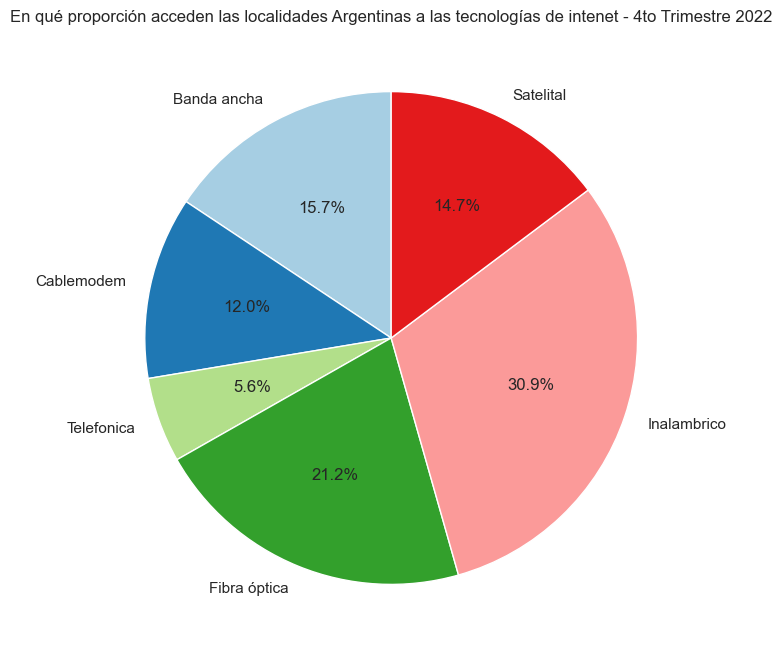

In [102]:
# Supongamos que ya tienes el DataFrame 'acceso_tecnologia' con las tecnologías y sus valores
# Puedes adaptar esto según tus datos reales

tecnologias = ['Banda ancha','Cablemodem', 'Telefonica', 'Fibra óptica', 'Inalambrico',	'Satelital']

# Filtrar el DataFrame para el cuarto trimestre de 2022
#datos_2022_t4 = acceso_nacional_tecno[(acceso_nacional_tecno['Año'] == 2022) & (acceso_nacional_tecno['Trimestre'] == 4)].copy()

# Sumar los valores de cada tecnología
total_por_tecnologia_1 = localidades_conectividad[tecnologias].sum()

# Configurar el estilo de la visualización usando seaborn
sns.set(style="whitegrid")

# Crear el gráfico de torta
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(total_por_tecnologia_1, labels=total_por_tecnologia_1.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Paired"))
ax.set_title('En qué proporción acceden las localidades Argentinas a las tecnologías de intenet - 4to Trimestre 2022')

plt.show()

        Este grafico analiza tener la teconología de internet en una localidad o no tenerla. En este sentido  podemos decir que el internet inalámbrico es el que llega a más localidades, o se puede llamar más federal. Si se tiene en cuenta la baja densidad poblacional de Argentina, la gran extensión, teritorios mal conectados, se entiende que este sistema sea muy extendido. 
        Un dato interesante es que Cablemodem como se vió anteriormente es el que tienen más accesos a nivel país, pero estos deben estar concentrados en las localidades grandes. Por otro lado fibra óptica es una tecnología relativamente barata y sirve para conectar localidades de densidades intermedias y pequeñas, no así hogares aislados. 

¿Cuál es el porcentaje de acceso a las distintas tecnologías de internet fijo para la totalidad de las localidades argentinas?

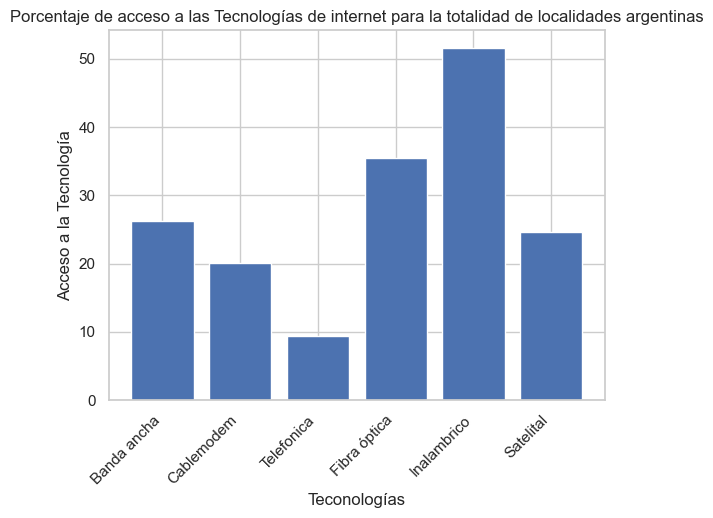

In [103]:
media_porcentual = localidades_conectividad[tecnologias].mean()*100

plt.bar(media_porcentual.index, media_porcentual.values)

plt.xlabel('Teconologías')
plt.ylabel ('Acceso a la Tecnología')
plt.title('Porcentaje de acceso a las Tecnologías de internet para la totalidad de localidades argentinas')

plt.xticks(rotation=45, ha="right")


plt.show()

        Esta descrición complementa el gráfico anterior. Si se tiene en cuenta la media, y considerando la transformación de 0 y 1 que se hizo en la tabla, es decir 0 la localidad no cuenta con la tecnología y 1 sí cuenta con la tecnología. Vemos que:
        El 51% de las localidades tiene acceso a la tecnología Inalámbrico, el 35% de las localidades sí cuentan con Fibra óptica. 26% y 24% de las localidades cuentan con Banda ancha y Satelital respectivamente. Solamente 20% de las localidades cuenta con Cablemodem y 9% con Telefónica o Dial Up . 


In [104]:
localidades_conectividad.to_excel('localidades_conectividad.xlsx')

#### Las siguientes preguntas y análisis servirán particularmente a la empresa que ha realizado la consulta

¿Cuántas localidades solo tienen conexiones Inalámbricas o Satelitales? Es decir no tienen alcance de Banda ancha, Cablemodem, Telefónica (Dial Up) o Fibra óptica?

In [105]:
filtro = (
(localidades_conectividad['Banda ancha']==0)&
(localidades_conectividad['Cablemodem']==0)&
(localidades_conectividad['Telefonica']==0)&
(localidades_conectividad['Fibra óptica']==0)&
((localidades_conectividad['Inalambrico']==1) | (localidades_conectividad['Satelital']==1))
)

localidades_aereas = localidades_conectividad.loc[filtro, ['Provincia', 'Partido', 'Localidad', 'Satelital','Inalambrico']]
print(localidades_aereas.count())
print(localidades_aereas['Localidad'].unique())
localidades_aereas

Provincia      1020
Partido        1020
Localidad      1020
Satelital      1020
Inalambrico    1020
dtype: int64
['Morea', 'Chillar', 'El Marquesado', 'Juan A. de la Peña', 'Mariano H. Alfonzo (Est. San Patricio)', ..., 'Bermejo', 'Caspi Corral', 'Colonia San Juan', 'Maquinista F. Savio (oeste)', 'Santa Teresa']
Length: 984
Categories (3912, object): ['1 De Agosto', '11 De Septiembre', '11 de Octubre', '12 de Octubre', ..., 'Ñancay', 'Ñanducita', 'Ñirihuau', 'Ñorquincó']


,Provincia,Partido,Localidad,Satelital,Inalambrico
6,BUENOS AIRES,9 de Julio,Morea,0,1
17,BUENOS AIRES,Azul,Chillar,1,1
24,BUENOS AIRES,General Pueyrredón,El Marquesado,0,1
36,BUENOS AIRES,Pergamino,Juan A. de la Peña,0,1
41,BUENOS AIRES,Pergamino,Mariano H. Alfonzo (Est. San Patricio),1,0
...,...,...,...,...,...
4285,SAN JUAN,Caucete,Bermejo,1,0
4287,SANTIAGO DEL ESTERO,Figueroa,Caspi Corral,0,1
4288,SANTIAGO DEL ESTERO,Figueroa,Colonia San Juan,0,1
4305,BUENOS AIRES,Pilar,Maquinista F. Savio (oeste),0,1


        Hay 1020 localidades que solo poseen internet Fijo por Satélite o Inalámbrico. 

####  Cantidad de localidades que tienen ambos tipos de internet (satelital e inalámbrico), las que solo tienen satelital, las que solo tienen inalámbrico.

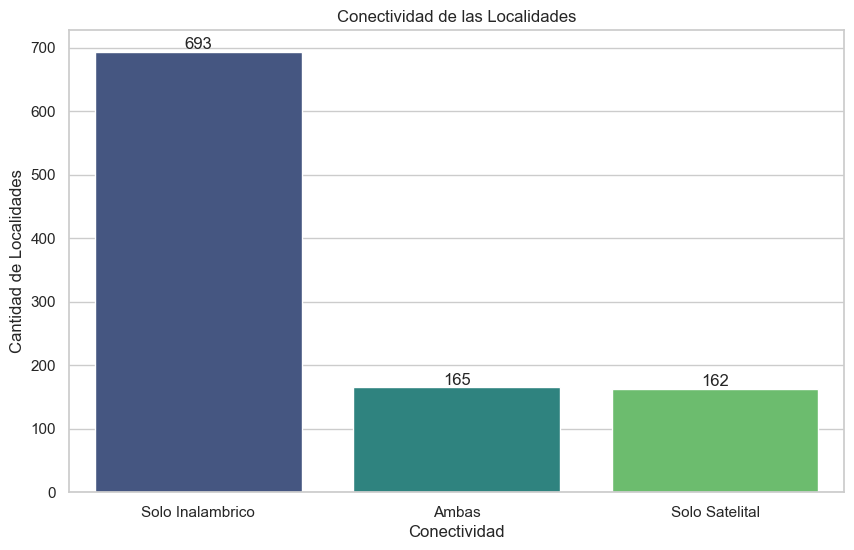

In [106]:
# Crear una nueva columna que clasifique las localidades según su conectividad
localidades_aereas['Conectividad'] = localidades_aereas.apply(
    lambda row: 'Ambas' if row['Satelital'] == 1 and row['Inalambrico'] == 1
    else 'Solo Satelital' if row['Satelital'] == 1 and row['Inalambrico'] == 0
    else 'Solo Inalambrico' if row['Satelital'] == 0 and row['Inalambrico'] == 1
    else 'Ninguno',
    axis=1
)

# Contar la cantidad de localidades en cada categoría
conteo_conectividad = localidades_aereas['Conectividad'].value_counts()

# Crear un gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=conteo_conectividad.index, y=conteo_conectividad.values, palette="viridis")
plt.title('Conectividad de las Localidades')
plt.xlabel('Conectividad')
plt.ylabel('Cantidad de Localidades')

# Mostrar el número en cada barra
for index, value in enumerate(conteo_conectividad.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [135]:
localidades_aereas.to_excel('localidades_aeres.xlsx')

¿Cómo es la velocidad en estas Localidades?

Para poder responder es necesario traer datos de un nuevo DataFrame sobre velocidades de bajada de internet por localidad. 

## DataFrame 7 : Accesos a Internet fijo por velocidad de bajada y localidad

In [107]:
1  #Abro el archivo csv descargado de ENACOM 
velocidad_localidades = pd.read_csv('data\.ipynb_checkpoints\AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171699333450840-checkpoint.csv')
velocidad_localidades

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3091,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3092,TUCUMAN,Trancas,Villa de Trancas,90112030,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3093,TUCUMAN,Yerba Buena,Villa Carmela,90119020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Borro las columnas de velocidades de mas de 30 Mbps

In [108]:
# Realizar la unión basada en la columna 'Localidad'
velocidad_localidades_aereas = pd.merge(localidades_aereas, velocidad_localidades, on='Localidad', how='left')
velocidad_localidades_aereas

,Provincia_x,Partido_x,Localidad,Satelital,Inalambrico,Conectividad,Provincia_y,Partido_y,Link Indec,Otros,...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,9 de Julio,Morea,0,1,Solo Inalambrico,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,Azul,Chillar,1,1,Ambas,BUENOS AIRES,Azul,6049040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,General Pueyrredón,El Marquesado,0,1,Solo Inalambrico,BUENOS AIRES,General Pueyrredón,6357090,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,Pergamino,Juan A. de la Peña,0,1,Solo Inalambrico,BUENOS AIRES,Pergamino,6623040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,Pergamino,Mariano H. Alfonzo (Est. San Patricio),1,0,Solo Satelital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,SANTIAGO DEL ESTERO,Figueroa,Colonia San Juan,0,1,Solo Inalambrico,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1246,BUENOS AIRES,Pilar,Maquinista F. Savio (oeste),0,1,Solo Inalambrico,BUENOS AIRES,Pilar,6638040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1247,BUENOS AIRES,Pilar,Santa Teresa,1,0,Solo Satelital,BUENOS AIRES,Pilar,6638040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1248,BUENOS AIRES,Pilar,Santa Teresa,1,0,Solo Satelital,LA PAMPA,Guatraché,42070050,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Obtener el número total de columnas en el DataFrame
num_columnas_totales = len(velocidad_localidades_aereas.columns)

# Especificar el rango de columnas que deseas mantener (excluir las últimas 10)
columnas_a_mantener = velocidad_localidades_aereas.columns[:num_columnas_totales - 30]

# Crear un nuevo DataFrame sin las últimas 10 columnas
velocidad_localidades_aereas = velocidad_localidades_aereas[columnas_a_mantener]

# Mostrar el resultado
velocidad_localidades_aereas


,Provincia_x,Partido_x,Localidad,Satelital,Inalambrico,Conectividad,Provincia_y,Partido_y,Link Indec,Otros,...,22 Mbps,23 Mbps,24 Mbps,25 Mbps,"25,1 Mbps","25,5 Mbps",26 Mbps,27 Mbps,30 Mbps,31 Mbps
0,BUENOS AIRES,9 de Julio,Morea,0,1,Solo Inalambrico,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,Azul,Chillar,1,1,Ambas,BUENOS AIRES,Azul,6049040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,General Pueyrredón,El Marquesado,0,1,Solo Inalambrico,BUENOS AIRES,General Pueyrredón,6357090,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,Pergamino,Juan A. de la Peña,0,1,Solo Inalambrico,BUENOS AIRES,Pergamino,6623040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,Pergamino,Mariano H. Alfonzo (Est. San Patricio),1,0,Solo Satelital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,SANTIAGO DEL ESTERO,Figueroa,Colonia San Juan,0,1,Solo Inalambrico,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1246,BUENOS AIRES,Pilar,Maquinista F. Savio (oeste),0,1,Solo Inalambrico,BUENOS AIRES,Pilar,6638040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1247,BUENOS AIRES,Pilar,Santa Teresa,1,0,Solo Satelital,BUENOS AIRES,Pilar,6638040,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1248,BUENOS AIRES,Pilar,Santa Teresa,1,0,Solo Satelital,LA PAMPA,Guatraché,42070050,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hago rangos de velocidades 

In [110]:


# Seleccionar solo las columnas relacionadas con la velocidad
columnas_velocidad = [col for col in velocidad_localidades_aereas.columns if 'Mbps' in col]
velocidades_seleccionadas = velocidad_localidades_aereas[columnas_velocidad]

# Crear un DataFrame auxiliar con las categorías de velocidad
categorias = pd.cut(velocidades_seleccionadas.mean(axis=1), bins=[0, 5, 10, 20, 30, float('inf')],
                    labels=['Menos de 5 Mbps', 'Entre 5 y 10 Mbps', 'Entre 10 y 20 Mbps', 'Entre 20 y 30 Mbps', 'Más de 30 Mbps'])

# Concatenar el DataFrame original con las categorías de velocidad
velocidad_localidades_aereas_rango = pd.concat([velocidad_localidades_aereas[['Provincia_x', 'Partido_x', 'Localidad', 'Conectividad','Link Indec']], categorias], axis=1)

# Mostrar el resultado
velocidad_localidades_aereas_rango


,Provincia_x,Partido_x,Localidad,Conectividad,Link Indec,0
0,BUENOS AIRES,9 de Julio,Morea,Solo Inalambrico,NaN,NaN
1,BUENOS AIRES,Azul,Chillar,Ambas,6049040,Más de 30 Mbps
2,BUENOS AIRES,General Pueyrredón,El Marquesado,Solo Inalambrico,6357090,Entre 5 y 10 Mbps
3,BUENOS AIRES,Pergamino,Juan A. de la Peña,Solo Inalambrico,6623040,Más de 30 Mbps
4,BUENOS AIRES,Pergamino,Mariano H. Alfonzo (Est. San Patricio),Solo Satelital,NaN,NaN
...,...,...,...,...,...,...
1245,SANTIAGO DEL ESTERO,Figueroa,Colonia San Juan,Solo Inalambrico,NaN,NaN
1246,BUENOS AIRES,Pilar,Maquinista F. Savio (oeste),Solo Inalambrico,6638040,Entre 20 y 30 Mbps
1247,BUENOS AIRES,Pilar,Santa Teresa,Solo Satelital,6638040,Menos de 5 Mbps
1248,BUENOS AIRES,Pilar,Santa Teresa,Solo Satelital,42070050,NaN


In [111]:
# Reemplaza estos nombres con los reales de tu DataFrame

nuevos_nombres = {
    0: 'Rango velocidad',
    'Link Indec': 'Código'

}
# Utiliza el método rename para cambiar los nombres de las columnas
velocidad_localidades_aereas_rango.rename(columns=nuevos_nombres, inplace=True)
velocidad_localidades_aereas_rango

,Provincia_x,Partido_x,Localidad,Conectividad,Código,Rango velocidad
0,BUENOS AIRES,9 de Julio,Morea,Solo Inalambrico,NaN,NaN
1,BUENOS AIRES,Azul,Chillar,Ambas,6049040,Más de 30 Mbps
2,BUENOS AIRES,General Pueyrredón,El Marquesado,Solo Inalambrico,6357090,Entre 5 y 10 Mbps
3,BUENOS AIRES,Pergamino,Juan A. de la Peña,Solo Inalambrico,6623040,Más de 30 Mbps
4,BUENOS AIRES,Pergamino,Mariano H. Alfonzo (Est. San Patricio),Solo Satelital,NaN,NaN
...,...,...,...,...,...,...
1245,SANTIAGO DEL ESTERO,Figueroa,Colonia San Juan,Solo Inalambrico,NaN,NaN
1246,BUENOS AIRES,Pilar,Maquinista F. Savio (oeste),Solo Inalambrico,6638040,Entre 20 y 30 Mbps
1247,BUENOS AIRES,Pilar,Santa Teresa,Solo Satelital,6638040,Menos de 5 Mbps
1248,BUENOS AIRES,Pilar,Santa Teresa,Solo Satelital,42070050,NaN


In [112]:
velocidad_localidades_aereas_rango.dropna

<bound method DataFrame.dropna of               Provincia_x           Partido_x  \
0            BUENOS AIRES          9 de Julio   
1            BUENOS AIRES                Azul   
2            BUENOS AIRES  General Pueyrredón   
3            BUENOS AIRES           Pergamino   
4            BUENOS AIRES           Pergamino   
...                   ...                 ...   
1245  SANTIAGO DEL ESTERO            Figueroa   
1246         BUENOS AIRES               Pilar   
1247         BUENOS AIRES               Pilar   
1248         BUENOS AIRES               Pilar   
1249         BUENOS AIRES               Pilar   

                                   Localidad      Conectividad    Código  \
0                                      Morea  Solo Inalambrico       NaN   
1                                    Chillar             Ambas   6049040   
2                              El Marquesado  Solo Inalambrico   6357090   
3                         Juan A. de la Peña  Solo Inalambrico   6623040 

In [113]:


# Replace NaN values with a suitable replacement, e.g., 0
velocidad_localidades_aereas_rango['Código'] = velocidad_localidades_aereas_rango['Código'].fillna(0)

# Convert the column to integers
velocidad_localidades_aereas_rango['Código'] = velocidad_localidades_aereas_rango['Código'].astype(int)


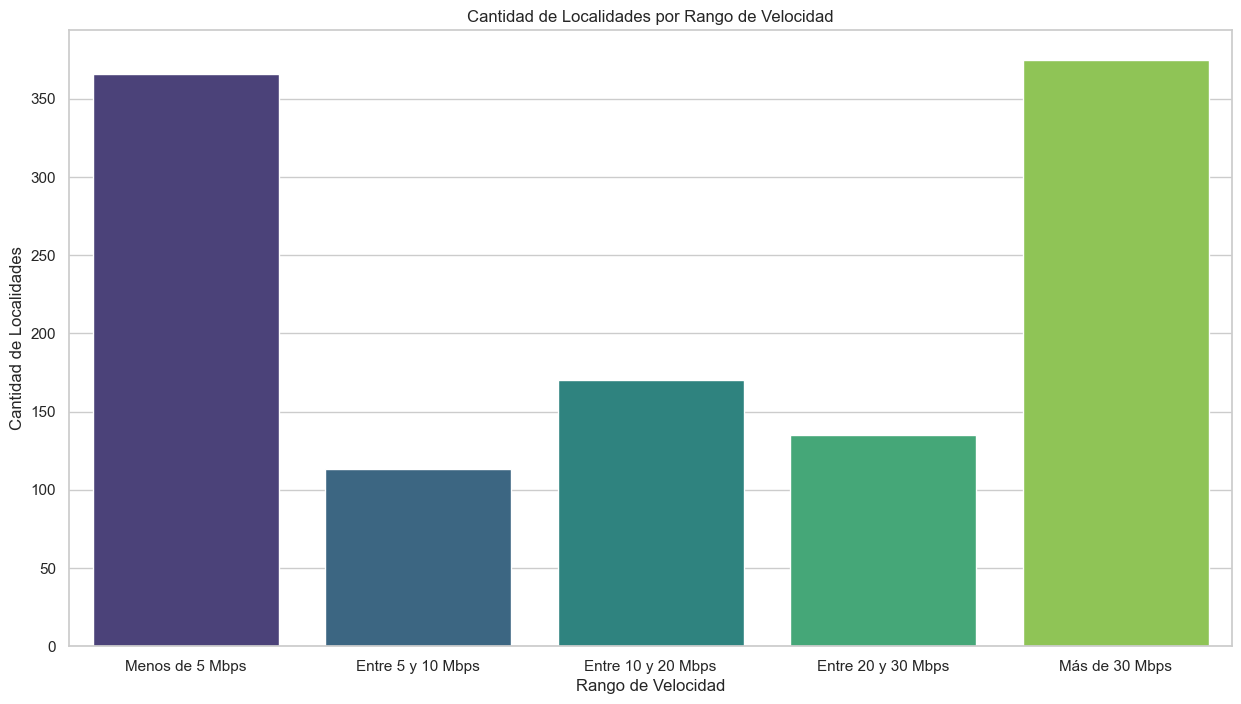

In [114]:
# Configuración de estilos de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
sns.countplot(data=velocidad_localidades_aereas_rango, x='Rango velocidad', palette='viridis')

# Personalizar el gráfico
plt.title('Cantidad de Localidades por Rango de Velocidad')
plt.xlabel('Rango de Velocidad')
plt.ylabel('Cantidad de Localidades')

# Mostrar el gráfico
plt.show()

        De las 1250 loclidades que tienen solo internet Satelital o Inalambrico, aproximadamente 360 tienen velocidad menor a 5Mbps, alrededor de 100 localidades velocidad entre 5 y 10 Mbps, 160 de entre 10 y 20 Mbps, 140 localidades con velocidad de entre 20 y 30 Mbps y 360 con mas de 30 Mbps.

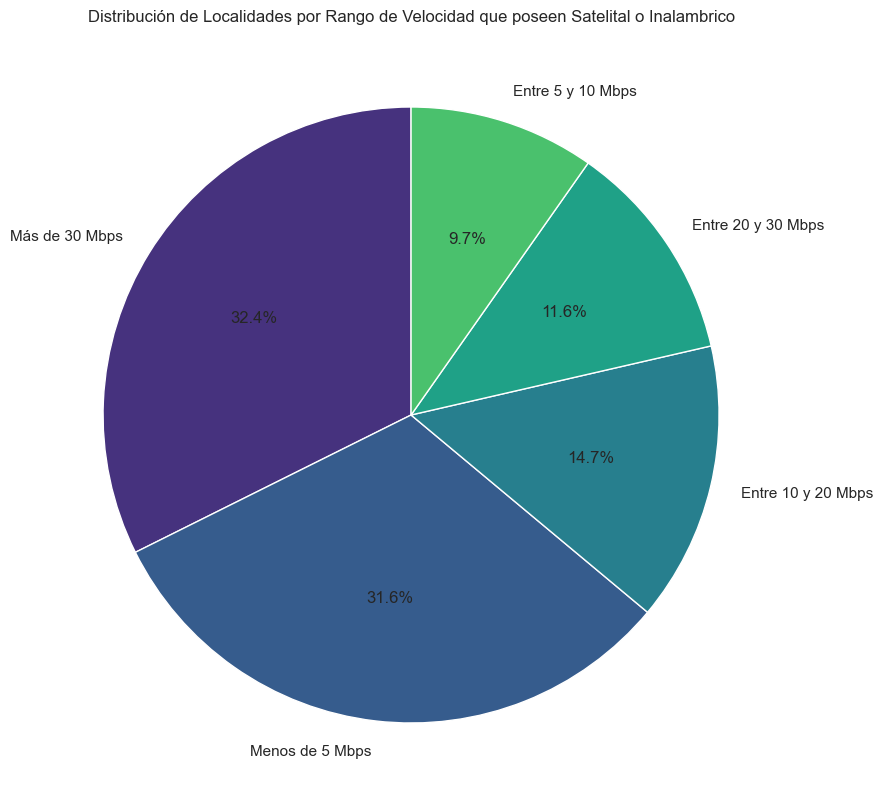

In [115]:
# Calcular la cantidad de localidades por rango de velocidad
conteo_por_rango = velocidad_localidades_aereas_rango['Rango velocidad'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(10, 10))
plt.pie(conteo_por_rango, labels=conteo_por_rango.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

# Personalizar el gráfico
plt.title('Distribución de Localidades por Rango de Velocidad que poseen Satelital o Inalambrico')

# Mostrar el gráfico
plt.show()

        El 68% de las Localidades que solo poseen Satelital o Inalmbrico tienen conexiones con velocidades menores a 30Mbps

#### Velocidad en solo Inalambrico

In [116]:


# Filtrar solo las localidades con conexión satelital
localidades_solo_inalambrico = velocidad_localidades_aereas[velocidad_localidades_aereas['Inalambrico'] == 1]

# Seleccionar solo las columnas relacionadas con la velocidad
columnas_velocidad = [col for col in localidades_solo_inalambrico.columns if 'Mbps' in col]
velocidades_seleccionadas = localidades_solo_inalambrico[columnas_velocidad]

# Crear un DataFrame auxiliar con las categorías de velocidad
categorias = pd.cut(velocidades_seleccionadas.mean(axis=1), bins=[0, 5, 10, 20, 30, float('inf')],
                    labels=['Menos de 5 Mbps', 'Entre 5 y 10 Mbps', 'Entre 10 y 20 Mbps', 'Entre 20 y 30 Mbps', 'Más de 30 Mbps'])

# Concatenar el DataFrame original con las categorías de velocidad
velocidad_localidades_inalambrico_rango = pd.concat([localidades_solo_inalambrico[['Provincia_x', 'Partido_x', 'Localidad']], categorias], axis=1)



In [117]:
# Reemplaza estos nombres con los reales de tu DataFrame

nuevos_nombres = {
    0: 'Rango velocidad',

}
# Utiliza el método rename para cambiar los nombres de las columnas
velocidad_localidades_inalambrico_rango.rename(columns=nuevos_nombres, inplace=True)
velocidad_localidades_inalambrico_rango

,Provincia_x,Partido_x,Localidad,Rango velocidad
0,BUENOS AIRES,9 de Julio,Morea,NaN
1,BUENOS AIRES,Azul,Chillar,Más de 30 Mbps
2,BUENOS AIRES,General Pueyrredón,El Marquesado,Entre 5 y 10 Mbps
3,BUENOS AIRES,Pergamino,Juan A. de la Peña,Más de 30 Mbps
5,BUENOS AIRES,Pergamino,Pinzón,Menos de 5 Mbps
...,...,...,...,...
1239,SAN JUAN,Angaco,Villa El Salvador - Villa Sefair,Entre 20 y 30 Mbps
1241,SAN JUAN,Calingasta,Calingasta,Más de 30 Mbps
1244,SANTIAGO DEL ESTERO,Figueroa,Caspi Corral,Menos de 5 Mbps
1245,SANTIAGO DEL ESTERO,Figueroa,Colonia San Juan,NaN


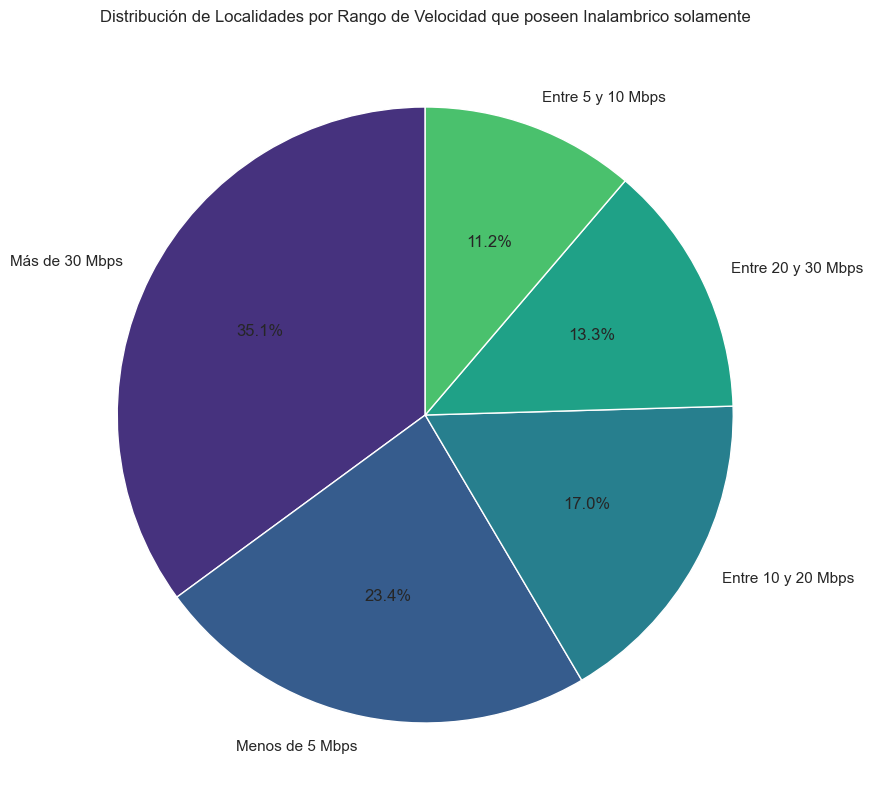

In [118]:
# Calcular la cantidad de localidades por rango de velocidad
conteo_por_rango = velocidad_localidades_inalambrico_rango['Rango velocidad'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(10, 10))
plt.pie(conteo_por_rango, labels=conteo_por_rango.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

# Personalizar el gráfico
plt.title('Distribución de Localidades por Rango de Velocidad que poseen Inalambrico solamente')

# Mostrar el gráfico
plt.show()

        Según este Gráfico las localidades con solo tecnología Inalámbrica es mejor que la Satelital, y que mejora la velocidad que considerndo ambas tecnologías juntas. 

#### ¿Cuantos hogares hay en estas localidades que solo poseen internet aereo?

Para ello cruzo información con el censo 2010 realizado por el INDEC. https://redatam.indec.gob.ar/argbin/RpWebEngine.exe/PortalAction?&MODE=MAIN&BASE=CPV2010B&MAIN=WebServerMain.inl&_ga=2.206842579.1327164544.1699746687-346990745.1699746687

In [119]:
df_hogares_fraccion = pd.read_excel('excel\Cantidad_hogares_fraccion_censo.xlsx')
df_hogares_fraccion

,Código,Hogar
0,200101,65
1,200102,3692
2,200103,5212
3,200104,4222
4,200105,2269
...,...,...
5423,9401406,3753
5424,9401407,3722
5425,9401408,3473
5426,9402101,0


In [120]:
df_hogares_fraccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Código  5428 non-null   int64
 1   Hogar   5428 non-null   int64
dtypes: int64(2)
memory usage: 84.9 KB


In [121]:
velocidad_localidades_aereas_rango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Provincia_x      1250 non-null   category
 1   Partido_x        1250 non-null   category
 2   Localidad        1250 non-null   object  
 3   Conectividad     1250 non-null   object  
 4   Código           1250 non-null   int32   
 5   Rango velocidad  1159 non-null   category
dtypes: category(3), int32(1), object(2)
memory usage: 50.0+ KB


In [122]:
velocidad_localidades_aereas_rango['Código'] = velocidad_localidades_aereas_rango['Código'] / 10

In [123]:


# Replace NaN values with a suitable replacement, e.g., 0
velocidad_localidades_aereas_rango['Código'] = velocidad_localidades_aereas_rango['Código'].fillna(0)

# Convert the column to integers
velocidad_localidades_aereas_rango['Código'] = velocidad_localidades_aereas_rango['Código'].astype(int)


In [124]:

velocidad_localidades_aereas_rango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Provincia_x      1250 non-null   category
 1   Partido_x        1250 non-null   category
 2   Localidad        1250 non-null   object  
 3   Conectividad     1250 non-null   object  
 4   Código           1250 non-null   int32   
 5   Rango velocidad  1159 non-null   category
dtypes: category(3), int32(1), object(2)
memory usage: 50.0+ KB


In [125]:
hogares_velocidad_aereo = pd.merge(velocidad_localidades_aereas_rango, df_hogares_fraccion, on='Código', how='left')
hogares_velocidad_aereo.head(10)


,Provincia_x,Partido_x,Localidad,Conectividad,Código,Rango velocidad,Hogar
0,BUENOS AIRES,9 de Julio,Morea,Solo Inalambrico,0,NaN,NaN
1,BUENOS AIRES,Azul,Chillar,Ambas,604904,Más de 30 Mbps,884.0
2,BUENOS AIRES,General Pueyrredón,El Marquesado,Solo Inalambrico,635709,Entre 5 y 10 Mbps,4527.0
3,BUENOS AIRES,Pergamino,Juan A. de la Peña,Solo Inalambrico,662304,Más de 30 Mbps,3269.0
4,BUENOS AIRES,Pergamino,Mariano H. Alfonzo (Est. San Patricio),Solo Satelital,0,NaN,NaN
5,BUENOS AIRES,Pergamino,Pinzón,Solo Inalambrico,662311,Menos de 5 Mbps,388.0
6,CATAMARCA,Ambato,Los Varela,Solo Satelital,1000711,Menos de 5 Mbps,NaN
7,CATAMARCA,Ancasti,Ancasti,Solo Satelital,1001401,Menos de 5 Mbps,163.0
8,CATAMARCA,Andalgalá,Aconquija,Solo Satelital,1002101,Menos de 5 Mbps,3446.0
9,CATAMARCA,Andalgalá,El Alamito,Solo Inalambrico,1002105,Entre 10 y 20 Mbps,27.0


        Esta tabla generada a partir del cruce entre información del INDEC de hogares por localidades y la tabla de ENACOM de velocidad por localidad, permite ver la cantidad de hogares que solo tienen acceso a Internet Fijo por vía aérea, para tener una idea de que tamaño de mercado hay.  

Para ir un poco más en profundidad deseo saber cuales son las localidades que tienen un internet con velocidad menor a 30 Mbps, es decir las más lentas. 

In [126]:
hogares_velocidad_aereo['Rango velocidad'].unique()

[NaN, 'Más de 30 Mbps', 'Entre 5 y 10 Mbps', 'Menos de 5 Mbps', 'Entre 10 y 20 Mbps', 'Entre 20 y 30 Mbps']
Categories (5, object): ['Menos de 5 Mbps' < 'Entre 5 y 10 Mbps' < 'Entre 10 y 20 Mbps' < 'Entre 20 y 30 Mbps' < 'Más de 30 Mbps']

In [127]:
hogares_velocidad_aereo = hogares_velocidad_aereo.dropna()

In [128]:
hogares_velocidad_aereo

,Provincia_x,Partido_x,Localidad,Conectividad,Código,Rango velocidad,Hogar
1,BUENOS AIRES,Azul,Chillar,Ambas,604904,Más de 30 Mbps,884.0
2,BUENOS AIRES,General Pueyrredón,El Marquesado,Solo Inalambrico,635709,Entre 5 y 10 Mbps,4527.0
3,BUENOS AIRES,Pergamino,Juan A. de la Peña,Solo Inalambrico,662304,Más de 30 Mbps,3269.0
5,BUENOS AIRES,Pergamino,Pinzón,Solo Inalambrico,662311,Menos de 5 Mbps,388.0
7,CATAMARCA,Ancasti,Ancasti,Solo Satelital,1001401,Menos de 5 Mbps,163.0
...,...,...,...,...,...,...,...
1242,SAN JUAN,Caucete,Bermejo,Solo Satelital,5002803,Más de 30 Mbps,5983.0
1243,SAN JUAN,Caucete,Bermejo,Solo Satelital,7003501,Menos de 5 Mbps,4152.0
1244,SANTIAGO DEL ESTERO,Figueroa,Caspi Corral,Solo Inalambrico,8607002,Menos de 5 Mbps,910.0
1246,BUENOS AIRES,Pilar,Maquinista F. Savio (oeste),Solo Inalambrico,663804,Entre 20 y 30 Mbps,3960.0


In [145]:
#Descargo el csv
hogares_velocidad_aereo.to_csv('hogares_velocidad_aereo.csv')
hogares_velocidad_aereo.to_excel('hogares_velocidad_aereo.xlsx')


In [130]:
hogares_velocidad_menor_30_aereo = hogares_velocidad_aereo[~hogares_velocidad_aereo['Rango velocidad'].isin([np.nan, 'Más de 30 Mbps'])]
hogares_velocidad_menor_30_aereo

,Provincia_x,Partido_x,Localidad,Conectividad,Código,Rango velocidad,Hogar
2,BUENOS AIRES,General Pueyrredón,El Marquesado,Solo Inalambrico,635709,Entre 5 y 10 Mbps,4527.0
5,BUENOS AIRES,Pergamino,Pinzón,Solo Inalambrico,662311,Menos de 5 Mbps,388.0
7,CATAMARCA,Ancasti,Ancasti,Solo Satelital,1001401,Menos de 5 Mbps,163.0
8,CATAMARCA,Andalgalá,Aconquija,Solo Satelital,1002101,Menos de 5 Mbps,3446.0
9,CATAMARCA,Andalgalá,El Alamito,Solo Inalambrico,1002105,Entre 10 y 20 Mbps,27.0
...,...,...,...,...,...,...,...
1239,SAN JUAN,Angaco,Villa El Salvador - Villa Sefair,Solo Inalambrico,7001402,Entre 20 y 30 Mbps,195.0
1243,SAN JUAN,Caucete,Bermejo,Solo Satelital,7003501,Menos de 5 Mbps,4152.0
1244,SANTIAGO DEL ESTERO,Figueroa,Caspi Corral,Solo Inalambrico,8607002,Menos de 5 Mbps,910.0
1246,BUENOS AIRES,Pilar,Maquinista F. Savio (oeste),Solo Inalambrico,663804,Entre 20 y 30 Mbps,3960.0


In [131]:
hogares_baja_velocidad_aerea_provincias = hogares_velocidad_menor_30_aereo.groupby('Provincia_x')[['Hogar']].sum().reset_index()
print("Total hogares: ", hogares_baja_velocidad_aerea_provincias['Hogar'].sum())
localidades_baja_velocidad_aerea_provincias = hogares_velocidad_menor_30_aereo.groupby('Provincia_x')['Localidad'].count().reset_index()
hogares_loc_baja_velocidad_aerea_provincias = hogares_baja_velocidad_aerea_provincias.merge(localidades_baja_velocidad_aerea_provincias, on='Provincia_x')
hogares_loc_baja_velocidad_aerea_provincias = hogares_loc_baja_velocidad_aerea_provincias.sort_values(by='Hogar', ascending=False)

hogares_loc_baja_velocidad_aerea_provincias

Total hogares:  890987.0


,Provincia_x,Hogar,Localidad
0,BUENOS AIRES,124930.0,91
7,ENTRE RIOS,105167.0,40
20,SANTA FE,95748.0,30
5,CORDOBA,87061.0,36
17,SAN JUAN,58209.0,31
6,CORRIENTES,57981.0,37
12,MENDOZA,56764.0,17
21,SANTIAGO DEL ESTERO,47027.0,42
18,SAN LUIS,40771.0,20
8,FORMOSA,35308.0,29


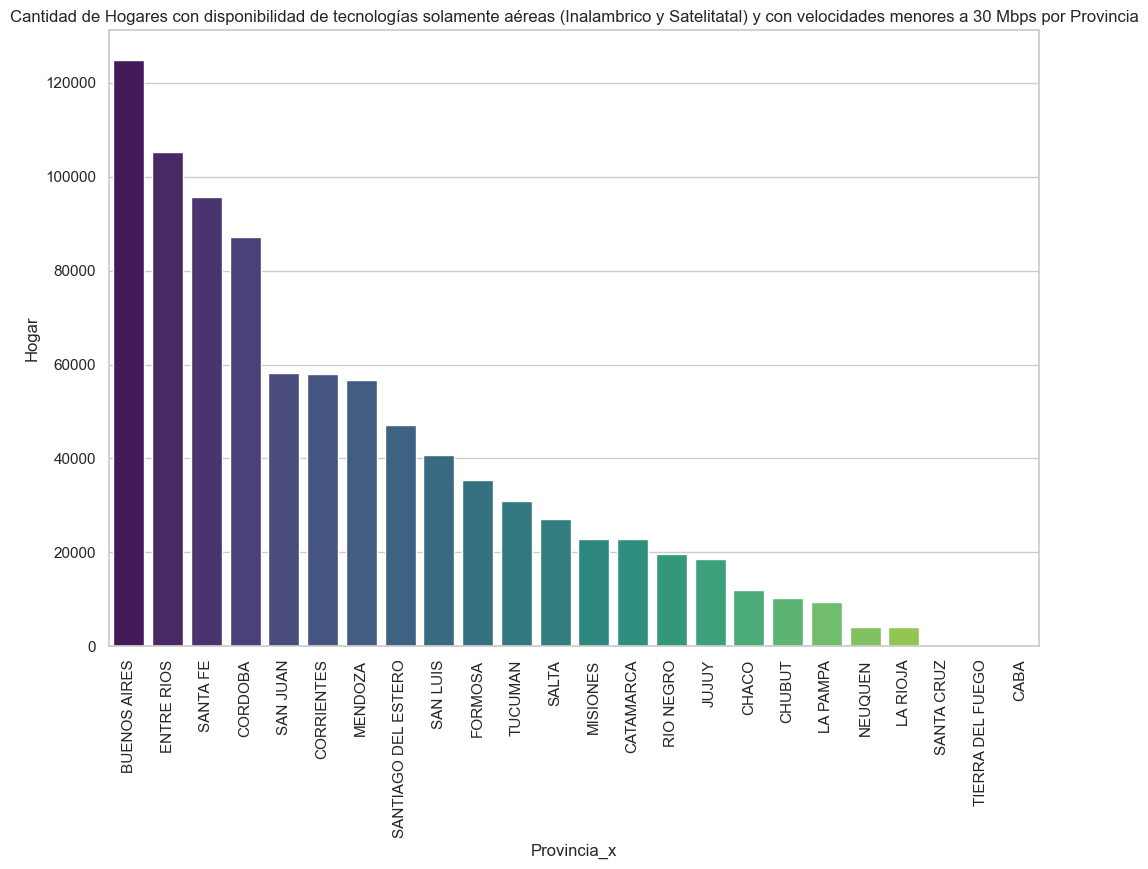

In [132]:

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia_x', y='Hogar', data=hogares_loc_baja_velocidad_aerea_provincias, palette="viridis", order=hogares_loc_baja_velocidad_aerea_provincias['Provincia_x'])
plt.xticks(rotation=90)
plt.title('Cantidad de Hogares con disponibilidad de tecnologías solamente aéreas (Inalambrico y Satelitatal) y con velocidades menores a 30 Mbps por Provincia')
plt.show()

En Argentina para el año 2022 existen 890.987 Hogares que solamente tienen opción de contratación de Internet Fijo vía aérea, es decir Inalámbrico y/o Satelitatal y que además tienen velocidades de bajada lentas, es decir menores a 30 Mbps. En el gráfico se muestra la distribución de la cantidad de estos hogares (áereo y baja velocidad), por provincia. 


## DataFrame 8  Histórico Velocidad Internet por Provincias

In [141]:
1  #Abro el archivo csv descargado de ENACOM 
historico_velocidad = pd.read_excel('excel\historico_velocidad_internet.xlsx')


2 #Veo las primeras filas
historico_velocidad.head(10)



,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92
5,2022,4,Córdoba,108.77
6,2022,4,Corrientes,94.72
7,2022,4,Entre Ríos,87.47
8,2022,4,Formosa,72.03
9,2022,4,Jujuy,39.32


In [142]:
3 #Analizo que formato tiene cada columna y nulos
historico_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [143]:
historico_velocidad.to_excel('historico_velocidad.xlsx')

## KPI

In [133]:
KPI=2
internet_penetracion['Nuevo_acceso']=((KPI/100)*internet_penetracion['Acceso_c/100_hogares'])+internet_penetracion['Acceso_c/100_hogares']
internet_penetracion['Diferencia_acceso'] = internet_penetracion['Nuevo_acceso']-internet_penetracion['Acceso_c/100_hogares']
internet_penetracion

,Año,Trimestre,Provincia,Acceso_c/100_hogares,Nuevo_acceso,Diferencia_acceso
0,2022,4,Buenos Aires,78.94,80.5188,1.5788
1,2022,4,Capital Federal,122.73,125.1846,2.4546
2,2022,4,Catamarca,65.77,67.0854,1.3154
3,2022,4,Chaco,43.62,44.4924,0.8724
4,2022,4,Chubut,85.57,87.2814,1.7114
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,28.94,29.5188,0.5788
860,2014,1,Santa Fe,47.85,48.8070,0.9570
861,2014,1,Santiago Del Estero,16.31,16.6362,0.3262
862,2014,1,Tierra Del Fuego,63.97,65.2494,1.2794


In [134]:
internet_penetracion.to_csv('internet_penetracion.csv')

1  #Abro el archivo csv descargado de ENACOM 
df = pd.read_csv('data\Internet_Penetracion.csv')

#1.B. #Abro el archivo excel descargado de ENACOM
acceso_tecno_localidad_excel = pd.read_excel('excel\Internet-Accesos-por-tecno_por_loc.xlsx')

2 #Veo las primeras filas
df.head(10)

3 #Analizo que formato tiene cada columna y nulos
df.info()